In [48]:
import numpy as np
import tensorflow as tf
import pandas as pd
import math
import random
import bisect
import matplotlib.pyplot as plot
%matplotlib inline

In [49]:
def f(x):
#     a = x[0]
#     b = x[1]
    s = 0
    for i in x:
        s+=i*i
    return s    #(a*a + b - 11)**2 + (a + b*b - 7)**2

# binary to real Decoding
def b2r(x):
    a = []
    for i in range(n):
        b = x[i*l:(i+1)*l]
        b = int(b,2)
        r = b*(Limits[i][1]-Limits[i][0])/(2**l - 1)
        r+=Limits[i][0]
        a.append(r)
    return a

# real to binary encoding
def r2b(x):
    a = ""
    for i in range(len(x)):
        b = (x[i]-Limits[i][0])*(2**l - 1)/(Limits[i][1]-Limits[i][0])
        b = round(b)
        b = bin(b)[2:]
        for i in range(l-len(b)):
            b = '0'+b
        a+=b
    return a

def F(a):
    return f(b2r(a))

def tornament(pa,b):
    print("TOURNAMENT")
    print()
    a = []
    t = 1
    while len(a)<len(pa):
        p = list(pa)
        print(f"Round {t} begins")
        print(p)
        print()
        tt = 1
        while(len(p)>=b):
            c = []
            print(f"Match {tt}")
            for i in range(b):
                n = random.randrange(len(p))
                c.append([F(p[n]),p[n]])
                p.remove(p[n])
            print(f"Pool ->",c)
            c.sort()
            if m==1:
                c = c[::-1]
            print(f"Standings ->",c)
            print(f"Result -> {c[0][1]} wins")
            a.append(c[0][1])
            tt+=1
        print()
        t+=1
    print(f"Finalselection ->",a)
    print()
    return a

def roulette(p):
    s = 0
    for i in p:
        s+=F(i)
    a = []
    c = 0
    for i in p:
        c+=F(i)
        a.append(c/s)
    su = []
    for i in range(len(p)):
        prob = random.random()
        n = bisect.bisect_left(p,prob)
        su.append(p[n])
    return su

def cross(a,b,k):
    si = random.random()
    if si>pc:
        return a,b
    n = len(a)
    s = [i for i in range(1,n)]
    c = []
    for i in range(k):
        su = random.randrange(len(s))
        c.append(s[su])
        s.remove(s[su])
    c.sort()
    if k%2==1:
        c.append(n)
    o1 = list(a)
    o2 = list(b)
    for i in range(int((k+1.1)/2)):
        for j in range(c[2*i],c[2*i+1]):
            (o1[j],o2[j]) = (o2[j],o1[j])
    o1 = ''.join(o1)
    o2 = ''.join(o2)
    return o1,o2

def cross_uni(a,b):
    si = random.random()
    if si>pc:
        return a,b
    c = ""
    for i in range(len(a)):
        c+=str(round(random.random())) 
    #c = "00101"
    o1 = list(a)
    o2 = list(b)
    for i in c:
        if i=='1':
            (o1[j],o2[j]) = (o2[j],o1[j])
    o1 = ''.join(o1)
    o2 = ''.join(o2)
    return o1,o2

def mutation_1(a):
    n = random.random()
    if n>pm:
        return a
    s = random.randrange(len(a))
    a = list(a)
    b = a[:s] + str(1-int(a[s])) + a[s+1:]
    b = ''.join(b)
    return b

def mutation_n(a):
    b = a
    a = list(a)
    for i in range(len(a)):
        n = random.random()
        if n>pm:
            continue
        a[i] = str(1-int(a[i]))
    a = ''.join(a)
    if a!=b:
        #print(f"{b} mutated -> {a}")
        fi[0]+=1
    return a

def survival(p,q):
    a = []
    if len(q)>2*len(p):
        b = q
    else:
        b = p+q
    for i in b:
        a.append([F(i),i])
    a.sort()
    if m==1:
        a = a[::-1]
    # a = a[:len(p)]
    c = []
    d = []
    for i in a:
        c.append(i[1])
        d.append([i[0],b2r(i[1])])      
    return [c[:pop],d]

In [50]:
n = 50                        # No. of decision parameters
Limits = [(-15,15) for i in range(n)]   # Range of decision parameters
l = 12                         # Length of Binary string of one parameter 
m = -1          # m=-1 minimisation / m=1 maximisation 
pc = 0.95       # Probablity of crossover
pm = 0.001      # Probablity of mutation
pop = 1000      # Initial population
t = 1          # Generation count
T = 200         # Max generation

parent = []
for i in range(pop):
    a = []
    for j in range(n):
        a.append(random.randint(Limits[j][0],Limits[j][1]))
    parent.append(a)
    
for i in range(pop):
        parent[i] = r2b(parent[i])
        

pparent = list(parent)


In [51]:
print(len(parent))


1000


In [52]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score


In [53]:
model = Sequential()
model.add(Dense(units=max(5,round(n**(2/3))), activation='relu', input_dim=n))
model.add(Dense(units=max(4,round(n**(1/3))), activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

[(2488.5314709710315, '010001000100101110111011010111011110100110011001100010001000100000000000011001100110000110011010000100010001110101010100100110011001111001100110011011101110010111011110101000100010010101010101010001000100100110011001001000100010101010101010011011101110001110111100101110111011100010001000110001000100011001100110011001100110110101010100010111011110010001000100010101010101100000000000001010101010011101110111101110111011011011101110110101010100101100110010000110011010010111011110110101010100111011101110101010101010100000000000110011001100111101110110010101010101010001000100100100010000010011001100'), (2563.1468287512243, '100000000000111111111111101000100010011011101110011101110111001110111100110011001100110111011101101000100010110011001100100010001000101000100010011101110111010001000100100100010000100110011001100110011001101110111011111001100110111111111111100010001000100110011001010001000100101000100010010101010101110001000100000100010001010111011110011101110111111

1/1 [==============================] - 0s 8ms/step - loss: 1.1068 - accuracy: 0.4995
Epoch 21/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0823 - accuracy: 0.4985
Epoch 22/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0598 - accuracy: 0.5030
Epoch 23/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0393 - accuracy: 0.5030
Epoch 24/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0205 - accuracy: 0.5030
Epoch 25/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0032 - accuracy: 0.5040
Epoch 26/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9873 - accuracy: 0.5065
Epoch 27/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9725 - accuracy: 0.5065
Epoch 28/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9591 - accuracy: 0.5070
Epoch 29/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9469 - accuracy: 0.5075
Epoch 30/100
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 0.7320 - accuracy: 0.5063
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7311 - accuracy: 0.5073
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7302 - accuracy: 0.5073
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7294 - accuracy: 0.5073
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7286 - accuracy: 0.5070
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7279 - accuracy: 0.5080
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7271 - accuracy: 0.5082
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7264 - accuracy: 0.5082
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7257 - accuracy: 0.5085
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7250 - accuracy: 0.5090
Epoch 13/100
1/1 [===================

1/1 [==============================] - 0s 8ms/step - loss: 0.7003 - accuracy: 0.5205
Epoch 87/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7001 - accuracy: 0.5205
Epoch 88/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7000 - accuracy: 0.5210
Epoch 89/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6999 - accuracy: 0.5205
Epoch 90/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6998 - accuracy: 0.5203
Epoch 91/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6997 - accuracy: 0.5203
Epoch 92/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6995 - accuracy: 0.5203
Epoch 93/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6994 - accuracy: 0.5200
Epoch 94/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6993 - accuracy: 0.5197
Epoch 95/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6992 - accuracy: 0.5195
Epoch 96/100
1/1 [=============

1/1 [==============================] - 0s 10ms/step - loss: 0.6973 - accuracy: 0.5127
Epoch 69/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6972 - accuracy: 0.5130
Epoch 70/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6971 - accuracy: 0.5128
Epoch 71/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6970 - accuracy: 0.5128
Epoch 72/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6970 - accuracy: 0.5133
Epoch 73/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6969 - accuracy: 0.5133
Epoch 74/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6968 - accuracy: 0.5135
Epoch 75/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6967 - accuracy: 0.5138
Epoch 76/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6967 - accuracy: 0.5140
Epoch 77/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6966 - accuracy: 0.5140
Epoch 78/100
1/1 [=======

1/1 [==============================] - 0s 12ms/step - loss: 0.6967 - accuracy: 0.5082
Epoch 51/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6966 - accuracy: 0.5081
Epoch 52/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6966 - accuracy: 0.5081
Epoch 53/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6965 - accuracy: 0.5081
Epoch 54/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6965 - accuracy: 0.5082
Epoch 55/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6964 - accuracy: 0.5096
Epoch 56/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6964 - accuracy: 0.5100
Epoch 57/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6963 - accuracy: 0.5102
Epoch 58/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6963 - accuracy: 0.5101
Epoch 59/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6962 - accuracy: 0.5099
Epoch 60/100
1/1 [=====

1/1 [==============================] - 0s 12ms/step - loss: 0.6946 - accuracy: 0.5045
Epoch 33/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6946 - accuracy: 0.5045
Epoch 34/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6946 - accuracy: 0.5046
Epoch 35/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6945 - accuracy: 0.5048
Epoch 36/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6945 - accuracy: 0.5044
Epoch 37/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6945 - accuracy: 0.5045
Epoch 38/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6944 - accuracy: 0.5042
Epoch 39/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6944 - accuracy: 0.5042
Epoch 40/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6944 - accuracy: 0.5040
Epoch 41/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6943 - accuracy: 0.5043
Epoch 42/100
1/1 [=====

1/1 [==============================] - 0s 12ms/step - loss: 0.6930 - accuracy: 0.5094
Epoch 15/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6930 - accuracy: 0.5094
Epoch 16/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6929 - accuracy: 0.5103
Epoch 17/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6929 - accuracy: 0.5109
Epoch 18/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6929 - accuracy: 0.5109
Epoch 19/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6929 - accuracy: 0.5111
Epoch 20/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6929 - accuracy: 0.5111
Epoch 21/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6928 - accuracy: 0.5117
Epoch 22/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6928 - accuracy: 0.5117
Epoch 23/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6928 - accuracy: 0.5117
Epoch 24/100
1/1 [=====

1/1 [==============================] - 0s 14ms/step - loss: 0.6914 - accuracy: 0.5163
Epoch 97/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6914 - accuracy: 0.5163
Epoch 98/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6914 - accuracy: 0.5163
Epoch 99/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6914 - accuracy: 0.5164
Epoch 100/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6913 - accuracy: 0.5166
Generation 7

Mutation


Epoch 1/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6927 - accuracy: 0.5143
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6927 - accuracy: 0.5145
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6926 - accuracy: 0.5146
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6926 - accuracy: 0.5144
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6926 - accuracy: 0.5144
Ep

1/1 [==============================] - 0s 16ms/step - loss: 0.6916 - accuracy: 0.5155
Epoch 79/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6916 - accuracy: 0.5156
Epoch 80/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6916 - accuracy: 0.5156
Epoch 81/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6916 - accuracy: 0.5157
Epoch 82/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6916 - accuracy: 0.5158
Epoch 83/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6915 - accuracy: 0.5158
Epoch 84/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6915 - accuracy: 0.5158
Epoch 85/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6915 - accuracy: 0.5161
Epoch 86/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6915 - accuracy: 0.5161
Epoch 87/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6915 - accuracy: 0.5159
Epoch 88/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6901 - accuracy: 0.5173
Epoch 61/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6901 - accuracy: 0.5168
Epoch 62/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6901 - accuracy: 0.5170
Epoch 63/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6900 - accuracy: 0.5169
Epoch 64/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6900 - accuracy: 0.5167
Epoch 65/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6900 - accuracy: 0.5166
Epoch 66/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6900 - accuracy: 0.5165
Epoch 67/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6900 - accuracy: 0.5163
Epoch 68/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6900 - accuracy: 0.5163
Epoch 69/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6900 - accuracy: 0.5159
Epoch 70/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6902 - accuracy: 0.5149
Epoch 43/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6902 - accuracy: 0.5148
Epoch 44/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6902 - accuracy: 0.5148
Epoch 45/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6902 - accuracy: 0.5150
Epoch 46/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6901 - accuracy: 0.5149
Epoch 47/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6901 - accuracy: 0.5148
Epoch 48/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6901 - accuracy: 0.5148
Epoch 49/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6901 - accuracy: 0.5147
Epoch 50/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6901 - accuracy: 0.5148
Epoch 51/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6901 - accuracy: 0.5148
Epoch 52/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.6896 - accuracy: 0.5148
Epoch 25/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6896 - accuracy: 0.5149
Epoch 26/100
1/1 [==============================] - 0s 24ms/step - loss: 0.6896 - accuracy: 0.5149
Epoch 27/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6896 - accuracy: 0.5149
Epoch 28/100
1/1 [==============================] - 0s 24ms/step - loss: 0.6896 - accuracy: 0.5149
Epoch 29/100
1/1 [==============================] - 0s 25ms/step - loss: 0.6896 - accuracy: 0.5150
Epoch 30/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6896 - accuracy: 0.5149
Epoch 31/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6895 - accuracy: 0.5149
Epoch 32/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6895 - accuracy: 0.5149
Epoch 33/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6895 - accuracy: 0.5150
Epoch 34/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.6907 - accuracy: 0.5107
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6907 - accuracy: 0.5109
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6907 - accuracy: 0.5112
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6907 - accuracy: 0.5115
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6907 - accuracy: 0.5117
Epoch 11/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6906 - accuracy: 0.5118
Epoch 12/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6906 - accuracy: 0.5121
Epoch 13/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6906 - accuracy: 0.5123
Epoch 14/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6906 - accuracy: 0.5123
Epoch 15/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6906 - accuracy: 0.5123
Epoch 16/100
1/1 [========

1/1 [==============================] - 0s 20ms/step - loss: 0.6894 - accuracy: 0.5178
Epoch 89/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6894 - accuracy: 0.5180
Epoch 90/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6894 - accuracy: 0.5181
Epoch 91/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6894 - accuracy: 0.5183
Epoch 92/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6894 - accuracy: 0.5183
Epoch 93/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6893 - accuracy: 0.5181
Epoch 94/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6893 - accuracy: 0.5181
Epoch 95/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6893 - accuracy: 0.5181
Epoch 96/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6893 - accuracy: 0.5181
Epoch 97/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6893 - accuracy: 0.5182
Epoch 98/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.6934 - accuracy: 0.4992
Epoch 71/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6934 - accuracy: 0.4994
Epoch 72/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6933 - accuracy: 0.5001
Epoch 73/100
1/1 [==============================] - 0s 25ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 74/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6933 - accuracy: 0.5001
Epoch 75/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6933 - accuracy: 0.5003
Epoch 76/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6933 - accuracy: 0.4999
Epoch 77/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6932 - accuracy: 0.5005
Epoch 78/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6932 - accuracy: 0.5006
Epoch 79/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6932 - accuracy: 0.5005
Epoch 80/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.6950 - accuracy: 0.4852
Epoch 53/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6950 - accuracy: 0.4854
Epoch 54/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6950 - accuracy: 0.4854
Epoch 55/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6950 - accuracy: 0.4854
Epoch 56/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6950 - accuracy: 0.4854
Epoch 57/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6949 - accuracy: 0.4854
Epoch 58/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6949 - accuracy: 0.4854
Epoch 59/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6949 - accuracy: 0.4854
Epoch 60/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6949 - accuracy: 0.4854
Epoch 61/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6948 - accuracy: 0.4855
Epoch 62/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6956 - accuracy: 0.4835
Epoch 35/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6956 - accuracy: 0.4835
Epoch 36/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6956 - accuracy: 0.4834
Epoch 37/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6955 - accuracy: 0.4834
Epoch 38/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6955 - accuracy: 0.4834
Epoch 39/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6955 - accuracy: 0.4834
Epoch 40/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6955 - accuracy: 0.4834
Epoch 41/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6955 - accuracy: 0.4835
Epoch 42/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6955 - accuracy: 0.4836
Epoch 43/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6955 - accuracy: 0.4837
Epoch 44/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6954 - accuracy: 0.4863
Epoch 17/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6954 - accuracy: 0.4863
Epoch 18/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6954 - accuracy: 0.4863
Epoch 19/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6953 - accuracy: 0.4863
Epoch 20/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6953 - accuracy: 0.4863
Epoch 21/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6953 - accuracy: 0.4863
Epoch 22/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6953 - accuracy: 0.4863
Epoch 23/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6953 - accuracy: 0.4863
Epoch 24/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6953 - accuracy: 0.4863
Epoch 25/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6952 - accuracy: 0.4863
Epoch 26/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6945 - accuracy: 0.4891
Epoch 99/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6945 - accuracy: 0.4889
Epoch 100/100
31/31 [==============================] - 0s 984us/step


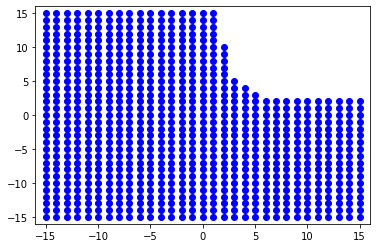

Generation 16

Mutation


Epoch 1/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6943 - accuracy: 0.4913
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6943 - accuracy: 0.4911
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6943 - accuracy: 0.4911
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6943 - accuracy: 0.4910
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6943 - accuracy: 0.4911
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6943 - accuracy: 0.4909
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6943 - accuracy: 0.4909
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6943 - accuracy: 0.4909
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6943 - accuracy: 0.4910
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6943 - accuracy: 

1/1 [==============================] - 0s 20ms/step - loss: 0.6941 - accuracy: 0.4913
Epoch 84/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6941 - accuracy: 0.4913
Epoch 85/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6941 - accuracy: 0.4913
Epoch 86/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6941 - accuracy: 0.4913
Epoch 87/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6941 - accuracy: 0.4913
Epoch 88/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6941 - accuracy: 0.4913
Epoch 89/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6941 - accuracy: 0.4913
Epoch 90/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6941 - accuracy: 0.4913
Epoch 91/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6941 - accuracy: 0.4913
Epoch 92/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6941 - accuracy: 0.4913
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.6938 - accuracy: 0.4940
Epoch 66/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6938 - accuracy: 0.4940
Epoch 67/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6938 - accuracy: 0.4942
Epoch 68/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6938 - accuracy: 0.4940
Epoch 69/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6938 - accuracy: 0.4940
Epoch 70/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6938 - accuracy: 0.4940
Epoch 71/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6938 - accuracy: 0.4941
Epoch 72/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6938 - accuracy: 0.4941
Epoch 73/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6938 - accuracy: 0.4940
Epoch 74/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6938 - accuracy: 0.4940
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.6935 - accuracy: 0.4976
Epoch 48/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6935 - accuracy: 0.4976
Epoch 49/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6935 - accuracy: 0.4976
Epoch 50/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6935 - accuracy: 0.4976
Epoch 51/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6935 - accuracy: 0.4976
Epoch 52/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6935 - accuracy: 0.4976
Epoch 53/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6935 - accuracy: 0.4976
Epoch 54/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6935 - accuracy: 0.4976
Epoch 55/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6935 - accuracy: 0.4975
Epoch 56/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6935 - accuracy: 0.4975
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6936 - accuracy: 0.4930
Epoch 30/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6936 - accuracy: 0.4930
Epoch 31/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6936 - accuracy: 0.4930
Epoch 32/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6936 - accuracy: 0.4930
Epoch 33/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6936 - accuracy: 0.4930
Epoch 34/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6936 - accuracy: 0.4930
Epoch 35/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6936 - accuracy: 0.4930
Epoch 36/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6936 - accuracy: 0.4930
Epoch 37/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6936 - accuracy: 0.4930
Epoch 38/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6936 - accuracy: 0.4931
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.4974
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.4973
Epoch 13/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6934 - accuracy: 0.4973
Epoch 14/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.4974
Epoch 15/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6934 - accuracy: 0.4974
Epoch 16/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6934 - accuracy: 0.4974
Epoch 17/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.4974
Epoch 18/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6933 - accuracy: 0.4974
Epoch 19/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6933 - accuracy: 0.4974
Epoch 20/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6933 - accuracy: 0.4974
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4988
Epoch 94/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6930 - accuracy: 0.4988
Epoch 95/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4991
Epoch 96/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4990
Epoch 97/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4989
Epoch 98/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4987
Epoch 99/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4988
Epoch 100/100
31/31 [==============================] - 0s 988us/step


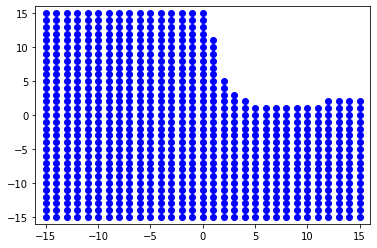

Generation 21

Mutation


Epoch 1/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6937 - accuracy: 0.4850
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 0.6937 - accuracy: 0.4849
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6937 - accuracy: 0.4850
Epoch 4/100
1/1 [==============================] - 0s 35ms/step - loss: 0.6937 - accuracy: 0.4850
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6937 - accuracy: 0.4852
Epoch 6/100
1/1 [==============================] - 0s 47ms/step - loss: 0.6937 - accuracy: 0.4851
Epoch 7/100
1/1 [==============================] - 0s 40ms/step - loss: 0.6937 - accuracy: 0.4850
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - loss: 0.6936 - accuracy: 0.4852
Epoch 9/100
1/1 [==============================] - 0s 33ms/step - loss: 0.6936 - accuracy: 0.4851
Epoch 10/100
1/1 [==============================] - 0s 34ms/step - loss: 0.6936 - accuracy: 

1/1 [==============================] - 0s 29ms/step - loss: 0.6934 - accuracy: 0.4963
Epoch 84/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6934 - accuracy: 0.4963
Epoch 85/100
1/1 [==============================] - 0s 30ms/step - loss: 0.6934 - accuracy: 0.4963
Epoch 86/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6934 - accuracy: 0.4963
Epoch 87/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6934 - accuracy: 0.4963
Epoch 88/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6934 - accuracy: 0.4963
Epoch 89/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6934 - accuracy: 0.4963
Epoch 90/100
1/1 [==============================] - 0s 33ms/step - loss: 0.6934 - accuracy: 0.4963
Epoch 91/100
1/1 [==============================] - 0s 30ms/step - loss: 0.6934 - accuracy: 0.4962
Epoch 92/100
1/1 [==============================] - 0s 25ms/step - loss: 0.6934 - accuracy: 0.4962
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5001
Epoch 66/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 67/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 68/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6928 - accuracy: 0.5001
Epoch 69/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.5001
Epoch 70/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4999
Epoch 71/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5002
Epoch 72/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.5002
Epoch 73/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.5001
Epoch 74/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.5002
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.4938
Epoch 48/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.4942
Epoch 49/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.4958
Epoch 50/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.4969
Epoch 51/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.4965
Epoch 52/100
1/1 [==============================] - 0s 30ms/step - loss: 0.6931 - accuracy: 0.4963
Epoch 53/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.4963
Epoch 54/100
1/1 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.4963
Epoch 55/100
1/1 [==============================] - 0s 43ms/step - loss: 0.6931 - accuracy: 0.4963
Epoch 56/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.6930 - accuracy: 0.4970
Epoch 30/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4971
Epoch 31/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6930 - accuracy: 0.4972
Epoch 32/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.4972
Epoch 33/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4971
Epoch 34/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6930 - accuracy: 0.4970
Epoch 35/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6930 - accuracy: 0.4970
Epoch 36/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4970
Epoch 37/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6930 - accuracy: 0.4970
Epoch 38/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4970
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.4807
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4809
Epoch 13/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4818
Epoch 14/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4824
Epoch 15/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4832
Epoch 16/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.4839
Epoch 17/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.4839
Epoch 18/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4839
Epoch 19/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4856
Epoch 20/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4863
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4970
Epoch 94/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6926 - accuracy: 0.4970
Epoch 95/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6926 - accuracy: 0.4969
Epoch 96/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6926 - accuracy: 0.4969
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6926 - accuracy: 0.4969
Epoch 98/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6926 - accuracy: 0.4969
Epoch 99/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6926 - accuracy: 0.4969
Epoch 100/100
31/31 [==============================] - 0s 974us/step


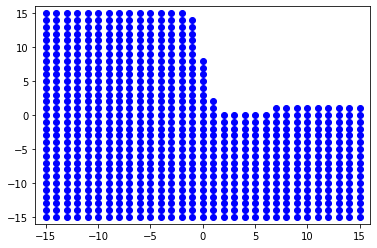

Generation 26

Mutation


Epoch 1/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.4967
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.4967
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6932 - accuracy: 0.4967
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.4967
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.4967
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.4967
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6932 - accuracy: 0.4967
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4967
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4967
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 

1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4943
Epoch 84/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4937
Epoch 85/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4934
Epoch 86/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4930
Epoch 87/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4931
Epoch 88/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4929
Epoch 89/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4925
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.4923
Epoch 91/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4919
Epoch 92/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6928 - accuracy: 0.4920
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6933 - accuracy: 0.4899
Epoch 66/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6933 - accuracy: 0.4899
Epoch 67/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6933 - accuracy: 0.4899
Epoch 68/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6933 - accuracy: 0.4899
Epoch 69/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6933 - accuracy: 0.4899
Epoch 70/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6933 - accuracy: 0.4899
Epoch 71/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6933 - accuracy: 0.4899
Epoch 72/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6933 - accuracy: 0.4898
Epoch 73/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6933 - accuracy: 0.4898
Epoch 74/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6933 - accuracy: 0.4898
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4931
Epoch 48/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4986
Epoch 49/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.5002
Epoch 50/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4970
Epoch 51/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4947
Epoch 52/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4918
Epoch 53/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4902
Epoch 54/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4902
Epoch 55/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4888
Epoch 56/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4877
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4780
Epoch 30/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4821
Epoch 31/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4866
Epoch 32/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4954
Epoch 33/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 34/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4963
Epoch 35/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4963
Epoch 36/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4964
Epoch 37/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.4964
Epoch 38/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4965
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 13/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 14/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.5173
Epoch 15/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5173
Epoch 16/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5174
Epoch 17/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5173
Epoch 18/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5174
Epoch 19/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5174
Epoch 20/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5174
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.5080
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6923 - accuracy: 0.5080
Epoch 95/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.5081
Epoch 96/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.5081
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6923 - accuracy: 0.5081
Epoch 98/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.5081
Epoch 99/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6923 - accuracy: 0.5081
Epoch 100/100
31/31 [==============================] - 0s 840us/step


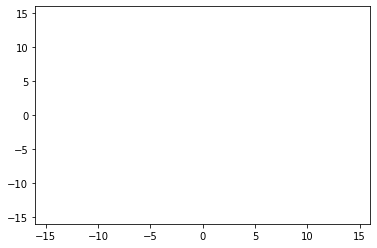

Generation 31

Mutation


Epoch 1/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6936 - accuracy: 0.5001
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6936 - accuracy: 0.5003
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6936 - accuracy: 0.5005
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6936 - accuracy: 0.5005
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6936 - accuracy: 0.5005
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6936 - accuracy: 0.5006
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6936 - accuracy: 0.5006
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6936 - accuracy: 0.5006
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6936 - accuracy: 0.5007
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6936 - accuracy: 

1/1 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.4946
Epoch 84/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.4946
Epoch 85/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6934 - accuracy: 0.4945
Epoch 86/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.4947
Epoch 87/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6934 - accuracy: 0.4947
Epoch 88/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.4947
Epoch 89/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6934 - accuracy: 0.4947
Epoch 90/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6934 - accuracy: 0.4946
Epoch 91/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6934 - accuracy: 0.4947
Epoch 92/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6934 - accuracy: 0.4947
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4685
Epoch 66/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4689
Epoch 67/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4692
Epoch 68/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.4692
Epoch 69/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4694
Epoch 70/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4698
Epoch 71/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4705
Epoch 72/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4708
Epoch 73/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4712
Epoch 74/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4713
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4808
Epoch 48/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4809
Epoch 49/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.4807
Epoch 50/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4807
Epoch 51/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4807
Epoch 52/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4807
Epoch 53/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4805
Epoch 54/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4806
Epoch 55/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4806
Epoch 56/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4807
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.4629
Epoch 30/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4630
Epoch 31/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4632
Epoch 32/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4633
Epoch 33/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4635
Epoch 34/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6931 - accuracy: 0.4636
Epoch 35/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4638
Epoch 36/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4640
Epoch 37/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4641
Epoch 38/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4643
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4860
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4859
Epoch 13/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.4859
Epoch 14/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.4859
Epoch 15/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4859
Epoch 16/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4859
Epoch 17/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6928 - accuracy: 0.4922
Epoch 18/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4994
Epoch 19/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4978
Epoch 20/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4964
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.6922 - accuracy: 0.4803
Epoch 94/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6922 - accuracy: 0.4803
Epoch 95/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6921 - accuracy: 0.4805
Epoch 96/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6921 - accuracy: 0.4803
Epoch 97/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6921 - accuracy: 0.4805
Epoch 98/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6921 - accuracy: 0.4804
Epoch 99/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6921 - accuracy: 0.4805
Epoch 100/100
31/31 [==============================] - 0s 980us/step


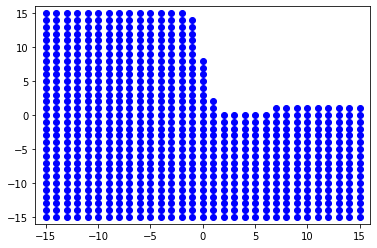

Generation 36

Mutation


Epoch 1/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6934 - accuracy: 0.4575
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6934 - accuracy: 0.4575
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6934 - accuracy: 0.4575
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6934 - accuracy: 0.4575
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6934 - accuracy: 0.4577
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6934 - accuracy: 0.4578
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6934 - accuracy: 0.4577
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.4579
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.4579
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6934 - accuracy: 

1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4641
Epoch 84/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4643
Epoch 85/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4645
Epoch 86/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.4648
Epoch 87/100
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.4647
Epoch 88/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6931 - accuracy: 0.4647
Epoch 89/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6931 - accuracy: 0.4652
Epoch 90/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4654
Epoch 91/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6931 - accuracy: 0.4659
Epoch 92/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6931 - accuracy: 0.4663
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4886
Epoch 66/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4887
Epoch 67/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4887
Epoch 68/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4887
Epoch 69/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6931 - accuracy: 0.4887
Epoch 70/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4886
Epoch 71/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4886
Epoch 72/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4886
Epoch 73/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4886
Epoch 74/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4886
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4823
Epoch 48/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4818
Epoch 49/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4818
Epoch 50/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4814
Epoch 51/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4809
Epoch 52/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4805
Epoch 53/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4800
Epoch 54/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4798
Epoch 55/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4799
Epoch 56/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4795
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.6935 - accuracy: 0.4569
Epoch 30/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6935 - accuracy: 0.4568
Epoch 31/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6935 - accuracy: 0.4568
Epoch 32/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6935 - accuracy: 0.4569
Epoch 33/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6935 - accuracy: 0.4568
Epoch 34/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6935 - accuracy: 0.4568
Epoch 35/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6935 - accuracy: 0.4570
Epoch 36/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6935 - accuracy: 0.4569
Epoch 37/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6935 - accuracy: 0.4570
Epoch 38/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6935 - accuracy: 0.4572
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.6930 - accuracy: 0.4771
Epoch 12/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6930 - accuracy: 0.4776
Epoch 13/100
1/1 [==============================] - 0s 24ms/step - loss: 0.6930 - accuracy: 0.4777
Epoch 14/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6930 - accuracy: 0.4788
Epoch 15/100
1/1 [==============================] - 0s 42ms/step - loss: 0.6930 - accuracy: 0.4791
Epoch 16/100
1/1 [==============================] - 0s 35ms/step - loss: 0.6930 - accuracy: 0.4791
Epoch 17/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6930 - accuracy: 0.4800
Epoch 18/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6930 - accuracy: 0.4802
Epoch 19/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6930 - accuracy: 0.4809
Epoch 20/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6930 - accuracy: 0.4811
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4890
Epoch 94/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6929 - accuracy: 0.4889
Epoch 95/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4889
Epoch 96/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.4889
Epoch 97/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4890
Epoch 98/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.4889
Epoch 99/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4890
Epoch 100/100
31/31 [==============================] - 0s 904us/step


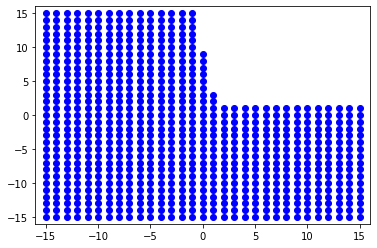

Generation 41

Mutation


Epoch 1/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4832
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6931 - accuracy: 0.4832
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6931 - accuracy: 0.4832
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4832
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4830
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4830
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4830
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6930 - accuracy: 0.4830
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6930 - accuracy: 0.4828
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 

1/1 [==============================] - 0s 17ms/step - loss: 0.6924 - accuracy: 0.4728
Epoch 84/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6923 - accuracy: 0.4729
Epoch 85/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6923 - accuracy: 0.4728
Epoch 86/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6923 - accuracy: 0.4728
Epoch 87/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6923 - accuracy: 0.4730
Epoch 88/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.4733
Epoch 89/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6923 - accuracy: 0.4733
Epoch 90/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6923 - accuracy: 0.4732
Epoch 91/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.4733
Epoch 92/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.4733
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4606
Epoch 66/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4604
Epoch 67/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4606
Epoch 68/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4606
Epoch 69/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4608
Epoch 70/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4611
Epoch 71/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4611
Epoch 72/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4613
Epoch 73/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4613
Epoch 74/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4613
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.6931 - accuracy: 0.4656
Epoch 48/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6931 - accuracy: 0.4656
Epoch 49/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4654
Epoch 50/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6931 - accuracy: 0.4654
Epoch 51/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4656
Epoch 52/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4658
Epoch 53/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4660
Epoch 54/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6931 - accuracy: 0.4660
Epoch 55/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4661
Epoch 56/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4663
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4773
Epoch 30/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4773
Epoch 31/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4775
Epoch 32/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4773
Epoch 33/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4777
Epoch 34/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.4778
Epoch 35/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4780
Epoch 36/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4782
Epoch 37/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.4782
Epoch 38/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4784
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4832
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4832
Epoch 13/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4836
Epoch 14/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4837
Epoch 15/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4837
Epoch 16/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4839
Epoch 17/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4837
Epoch 18/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6929 - accuracy: 0.4836
Epoch 19/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4834
Epoch 20/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4833
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4784
Epoch 94/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4782
Epoch 95/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6928 - accuracy: 0.4782
Epoch 96/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4782
Epoch 97/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4780
Epoch 98/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.4778
Epoch 99/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4776
Epoch 100/100
31/31 [==============================] - 0s 986us/step


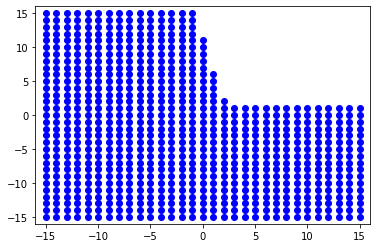

Generation 46

Mutation


Epoch 1/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4706
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6929 - accuracy: 0.4706
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4706
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4706
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4706
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4706
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4706
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4705
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6929 - accuracy: 0.4705
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 

1/1 [==============================] - 0s 22ms/step - loss: 0.6929 - accuracy: 0.4697
Epoch 84/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4697
Epoch 85/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.4697
Epoch 86/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6929 - accuracy: 0.4697
Epoch 87/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6929 - accuracy: 0.4697
Epoch 88/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.4697
Epoch 89/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6929 - accuracy: 0.4699
Epoch 90/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.4699
Epoch 91/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.4699
Epoch 92/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.4699
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 16ms/step - loss: 0.6927 - accuracy: 0.4708
Epoch 66/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6927 - accuracy: 0.4708
Epoch 67/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4708
Epoch 68/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.4708
Epoch 69/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6927 - accuracy: 0.4708
Epoch 70/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.4708
Epoch 71/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4709
Epoch 72/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4709
Epoch 73/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4710
Epoch 74/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4710
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4702
Epoch 48/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6927 - accuracy: 0.4701
Epoch 49/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4701
Epoch 50/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6927 - accuracy: 0.4701
Epoch 51/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.4701
Epoch 52/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.4701
Epoch 53/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4701
Epoch 54/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4701
Epoch 55/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.4701
Epoch 56/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4701
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4689
Epoch 30/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6927 - accuracy: 0.4689
Epoch 31/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4688
Epoch 32/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6927 - accuracy: 0.4690
Epoch 33/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4690
Epoch 34/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4689
Epoch 35/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.4690
Epoch 36/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.4688
Epoch 37/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6927 - accuracy: 0.4689
Epoch 38/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.4688
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6925 - accuracy: 0.4673
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6925 - accuracy: 0.4673
Epoch 13/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6925 - accuracy: 0.4674
Epoch 14/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6925 - accuracy: 0.4674
Epoch 15/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6925 - accuracy: 0.4676
Epoch 16/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6925 - accuracy: 0.4676
Epoch 17/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6925 - accuracy: 0.4676
Epoch 18/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6925 - accuracy: 0.4676
Epoch 19/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6925 - accuracy: 0.4676
Epoch 20/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6925 - accuracy: 0.4675
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6924 - accuracy: 0.4684
Epoch 94/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6924 - accuracy: 0.4684
Epoch 95/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6924 - accuracy: 0.4684
Epoch 96/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6924 - accuracy: 0.4683
Epoch 97/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6924 - accuracy: 0.4681
Epoch 98/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6924 - accuracy: 0.4682
Epoch 99/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6924 - accuracy: 0.4683
Epoch 100/100
31/31 [==============================] - 0s 927us/step


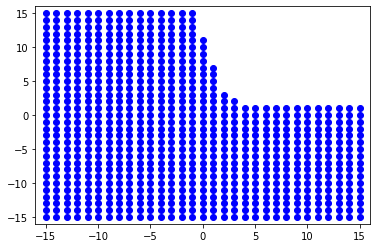

Generation 51

Mutation


Epoch 1/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4572
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4574
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4575
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4575
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.4575
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4574
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.4574
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4575
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4575
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 

1/1 [==============================] - 0s 18ms/step - loss: 0.6926 - accuracy: 0.4596
Epoch 84/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6926 - accuracy: 0.4597
Epoch 85/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6926 - accuracy: 0.4598
Epoch 86/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6926 - accuracy: 0.4598
Epoch 87/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6926 - accuracy: 0.4600
Epoch 88/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6926 - accuracy: 0.4600
Epoch 89/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6926 - accuracy: 0.4600
Epoch 90/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6926 - accuracy: 0.4601
Epoch 91/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6926 - accuracy: 0.4601
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6926 - accuracy: 0.4600
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.4659
Epoch 66/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.4660
Epoch 67/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6920 - accuracy: 0.4660
Epoch 68/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6920 - accuracy: 0.4658
Epoch 69/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.4660
Epoch 70/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6920 - accuracy: 0.4660
Epoch 71/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.4661
Epoch 72/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6920 - accuracy: 0.4661
Epoch 73/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.4660
Epoch 74/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6920 - accuracy: 0.4661
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.4694
Epoch 48/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6920 - accuracy: 0.4694
Epoch 49/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6920 - accuracy: 0.4695
Epoch 50/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6920 - accuracy: 0.4694
Epoch 51/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.4695
Epoch 52/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.4696
Epoch 53/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.4696
Epoch 54/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6920 - accuracy: 0.4695
Epoch 55/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.4696
Epoch 56/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6920 - accuracy: 0.4696
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.6916 - accuracy: 0.4688
Epoch 30/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6916 - accuracy: 0.4689
Epoch 31/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6916 - accuracy: 0.4690
Epoch 32/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6916 - accuracy: 0.4691
Epoch 33/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6916 - accuracy: 0.4691
Epoch 34/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6916 - accuracy: 0.4691
Epoch 35/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6916 - accuracy: 0.4692
Epoch 36/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6915 - accuracy: 0.4692
Epoch 37/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6915 - accuracy: 0.4692
Epoch 38/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6915 - accuracy: 0.4692
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6910 - accuracy: 0.4733
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6910 - accuracy: 0.4733
Epoch 13/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6910 - accuracy: 0.4733
Epoch 14/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6910 - accuracy: 0.4732
Epoch 15/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6910 - accuracy: 0.4733
Epoch 16/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6909 - accuracy: 0.4734
Epoch 17/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6909 - accuracy: 0.4735
Epoch 18/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6909 - accuracy: 0.4734
Epoch 19/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6909 - accuracy: 0.4734
Epoch 20/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6909 - accuracy: 0.4735
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.6904 - accuracy: 0.4757
Epoch 94/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6904 - accuracy: 0.4758
Epoch 95/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6904 - accuracy: 0.4760
Epoch 96/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6904 - accuracy: 0.4759
Epoch 97/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6904 - accuracy: 0.4759
Epoch 98/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6904 - accuracy: 0.4759
Epoch 99/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6904 - accuracy: 0.4757
Epoch 100/100
31/31 [==============================] - 0s 870us/step


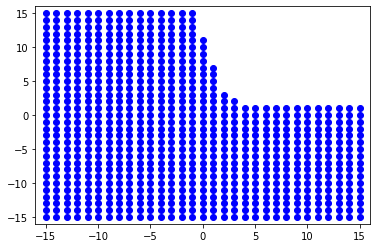

Generation 56

Mutation


Epoch 1/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6902 - accuracy: 0.4793
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6902 - accuracy: 0.4793
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6902 - accuracy: 0.4793
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6902 - accuracy: 0.4793
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6902 - accuracy: 0.4793
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6902 - accuracy: 0.4793
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6902 - accuracy: 0.4793
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6902 - accuracy: 0.4795
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6902 - accuracy: 0.4795
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6902 - accuracy: 

1/1 [==============================] - 0s 17ms/step - loss: 0.6895 - accuracy: 0.4829
Epoch 84/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6895 - accuracy: 0.4832
Epoch 85/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6895 - accuracy: 0.4833
Epoch 86/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6894 - accuracy: 0.4832
Epoch 87/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6894 - accuracy: 0.4832
Epoch 88/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6894 - accuracy: 0.4834
Epoch 89/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6894 - accuracy: 0.4834
Epoch 90/100
1/1 [==============================] - 0s 25ms/step - loss: 0.6894 - accuracy: 0.4834
Epoch 91/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6894 - accuracy: 0.4836
Epoch 92/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6894 - accuracy: 0.4837
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6882 - accuracy: 0.4857
Epoch 66/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6882 - accuracy: 0.4859
Epoch 67/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6882 - accuracy: 0.4859
Epoch 68/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6882 - accuracy: 0.4861
Epoch 69/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6882 - accuracy: 0.4861
Epoch 70/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6881 - accuracy: 0.4861
Epoch 71/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6881 - accuracy: 0.4862
Epoch 72/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6881 - accuracy: 0.4863
Epoch 73/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6881 - accuracy: 0.4865
Epoch 74/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6881 - accuracy: 0.4867
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6859 - accuracy: 0.4976
Epoch 48/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6859 - accuracy: 0.4976
Epoch 49/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6859 - accuracy: 0.4976
Epoch 50/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6858 - accuracy: 0.4974
Epoch 51/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6858 - accuracy: 0.4975
Epoch 52/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6858 - accuracy: 0.4977
Epoch 53/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6858 - accuracy: 0.4978
Epoch 54/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6857 - accuracy: 0.4978
Epoch 55/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6857 - accuracy: 0.4978
Epoch 56/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6857 - accuracy: 0.4978
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.6824 - accuracy: 0.5081
Epoch 30/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6823 - accuracy: 0.5081
Epoch 31/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6823 - accuracy: 0.5081
Epoch 32/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6822 - accuracy: 0.5081
Epoch 33/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6822 - accuracy: 0.5082
Epoch 34/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6822 - accuracy: 0.5082
Epoch 35/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6821 - accuracy: 0.5085
Epoch 36/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6821 - accuracy: 0.5085
Epoch 37/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6820 - accuracy: 0.5085
Epoch 38/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6820 - accuracy: 0.5084
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6768 - accuracy: 0.5228
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6767 - accuracy: 0.5231
Epoch 13/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6766 - accuracy: 0.5236
Epoch 14/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6765 - accuracy: 0.5241
Epoch 15/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6765 - accuracy: 0.5240
Epoch 16/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6764 - accuracy: 0.5241
Epoch 17/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6763 - accuracy: 0.5242
Epoch 18/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6762 - accuracy: 0.5243
Epoch 19/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6761 - accuracy: 0.5243
Epoch 20/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6760 - accuracy: 0.5246
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6688 - accuracy: 0.6960
Epoch 94/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6687 - accuracy: 0.6964
Epoch 95/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6685 - accuracy: 0.6971
Epoch 96/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6684 - accuracy: 0.6977
Epoch 97/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6683 - accuracy: 0.6986
Epoch 98/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6682 - accuracy: 0.6992
Epoch 99/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6681 - accuracy: 0.6996
Epoch 100/100
31/31 [==============================] - 0s 886us/step


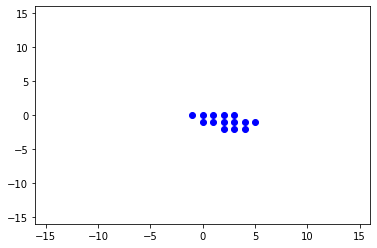

Generation 61

Mutation


Epoch 1/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6740 - accuracy: 0.6670
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6740 - accuracy: 0.6672
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6739 - accuracy: 0.6675
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6738 - accuracy: 0.6678
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6737 - accuracy: 0.6679
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6736 - accuracy: 0.6682
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6735 - accuracy: 0.6684
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6735 - accuracy: 0.6686
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6734 - accuracy: 0.6688
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6733 - accuracy: 

1/1 [==============================] - 0s 18ms/step - loss: 0.6669 - accuracy: 0.6829
Epoch 84/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6668 - accuracy: 0.6831
Epoch 85/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6667 - accuracy: 0.6833
Epoch 86/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6666 - accuracy: 0.6834
Epoch 87/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6665 - accuracy: 0.6837
Epoch 88/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6664 - accuracy: 0.6840
Epoch 89/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6663 - accuracy: 0.6843
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6662 - accuracy: 0.6845
Epoch 91/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6661 - accuracy: 0.6846
Epoch 92/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6661 - accuracy: 0.6847
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.6551 - accuracy: 0.7121
Epoch 66/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6550 - accuracy: 0.7125
Epoch 67/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6549 - accuracy: 0.7127
Epoch 68/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6547 - accuracy: 0.7129
Epoch 69/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6546 - accuracy: 0.7132
Epoch 70/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6545 - accuracy: 0.7134
Epoch 71/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6543 - accuracy: 0.7135
Epoch 72/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6542 - accuracy: 0.7138
Epoch 73/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6541 - accuracy: 0.7142
Epoch 74/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6539 - accuracy: 0.7144
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6405 - accuracy: 0.7404
Epoch 48/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6403 - accuracy: 0.7405
Epoch 49/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6402 - accuracy: 0.7404
Epoch 50/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6400 - accuracy: 0.7405
Epoch 51/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6398 - accuracy: 0.7409
Epoch 52/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6396 - accuracy: 0.7413
Epoch 53/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6395 - accuracy: 0.7415
Epoch 54/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6393 - accuracy: 0.7415
Epoch 55/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6391 - accuracy: 0.7416
Epoch 56/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6390 - accuracy: 0.7419
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.6251 - accuracy: 0.7602
Epoch 30/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6249 - accuracy: 0.7603
Epoch 31/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6247 - accuracy: 0.7606
Epoch 32/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6245 - accuracy: 0.7606
Epoch 33/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6243 - accuracy: 0.7606
Epoch 34/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6241 - accuracy: 0.7610
Epoch 35/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6239 - accuracy: 0.7610
Epoch 36/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6237 - accuracy: 0.7611
Epoch 37/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6235 - accuracy: 0.7613
Epoch 38/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6233 - accuracy: 0.7616
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.6048 - accuracy: 0.7825
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6046 - accuracy: 0.7828
Epoch 13/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6043 - accuracy: 0.7828
Epoch 14/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6041 - accuracy: 0.7830
Epoch 15/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6038 - accuracy: 0.7832
Epoch 16/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6036 - accuracy: 0.7832
Epoch 17/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6033 - accuracy: 0.7836
Epoch 18/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6031 - accuracy: 0.7836
Epoch 19/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6028 - accuracy: 0.7838
Epoch 20/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6026 - accuracy: 0.7839
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.5836 - accuracy: 0.7960
Epoch 94/100
1/1 [==============================] - 0s 23ms/step - loss: 0.5833 - accuracy: 0.7962
Epoch 95/100
1/1 [==============================] - 0s 20ms/step - loss: 0.5830 - accuracy: 0.7964
Epoch 96/100
1/1 [==============================] - 0s 20ms/step - loss: 0.5828 - accuracy: 0.7966
Epoch 97/100
1/1 [==============================] - 0s 20ms/step - loss: 0.5825 - accuracy: 0.7968
Epoch 98/100
1/1 [==============================] - 0s 20ms/step - loss: 0.5822 - accuracy: 0.7970
Epoch 99/100
1/1 [==============================] - 0s 21ms/step - loss: 0.5819 - accuracy: 0.7973
Epoch 100/100
31/31 [==============================] - 0s 882us/step


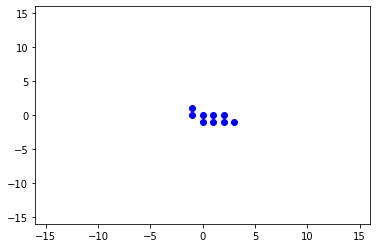

Generation 66

Mutation


Epoch 1/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5797 - accuracy: 0.8010
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5794 - accuracy: 0.8011
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5791 - accuracy: 0.8011
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5788 - accuracy: 0.8012
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5785 - accuracy: 0.8013
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5783 - accuracy: 0.8012
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5780 - accuracy: 0.8015
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5777 - accuracy: 0.8015
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5774 - accuracy: 0.8016
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5772 - accuracy: 

1/1 [==============================] - 0s 17ms/step - loss: 0.5566 - accuracy: 0.8110
Epoch 84/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5563 - accuracy: 0.8110
Epoch 85/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5561 - accuracy: 0.8111
Epoch 86/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5558 - accuracy: 0.8113
Epoch 87/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5555 - accuracy: 0.8115
Epoch 88/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5552 - accuracy: 0.8115
Epoch 89/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5549 - accuracy: 0.8118
Epoch 90/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5546 - accuracy: 0.8120
Epoch 91/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5543 - accuracy: 0.8121
Epoch 92/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5540 - accuracy: 0.8122
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.5274 - accuracy: 0.8282
Epoch 66/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5271 - accuracy: 0.8282
Epoch 67/100
1/1 [==============================] - 0s 20ms/step - loss: 0.5267 - accuracy: 0.8282
Epoch 68/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5264 - accuracy: 0.8285
Epoch 69/100
1/1 [==============================] - 0s 20ms/step - loss: 0.5261 - accuracy: 0.8285
Epoch 70/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5258 - accuracy: 0.8286
Epoch 71/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5254 - accuracy: 0.8287
Epoch 72/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5251 - accuracy: 0.8289
Epoch 73/100
1/1 [==============================] - 0s 20ms/step - loss: 0.5248 - accuracy: 0.8288
Epoch 74/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5245 - accuracy: 0.8288
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.4991 - accuracy: 0.8406
Epoch 48/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4987 - accuracy: 0.8407
Epoch 49/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4984 - accuracy: 0.8408
Epoch 50/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4980 - accuracy: 0.8410
Epoch 51/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4977 - accuracy: 0.8411
Epoch 52/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4973 - accuracy: 0.8414
Epoch 53/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4970 - accuracy: 0.8417
Epoch 54/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4966 - accuracy: 0.8417
Epoch 55/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4963 - accuracy: 0.8418
Epoch 56/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4959 - accuracy: 0.8418
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.4702 - accuracy: 0.8502
Epoch 30/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4699 - accuracy: 0.8504
Epoch 31/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4695 - accuracy: 0.8504
Epoch 32/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4691 - accuracy: 0.8504
Epoch 33/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4688 - accuracy: 0.8504
Epoch 34/100
1/1 [==============================] - 0s 27ms/step - loss: 0.4684 - accuracy: 0.8504
Epoch 35/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4680 - accuracy: 0.8504
Epoch 36/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4677 - accuracy: 0.8505
Epoch 37/100
1/1 [==============================] - 0s 23ms/step - loss: 0.4673 - accuracy: 0.8508
Epoch 38/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4670 - accuracy: 0.8509
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.4315 - accuracy: 0.8655
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4312 - accuracy: 0.8654
Epoch 13/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4308 - accuracy: 0.8655
Epoch 14/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4304 - accuracy: 0.8656
Epoch 15/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4300 - accuracy: 0.8657
Epoch 16/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4297 - accuracy: 0.8658
Epoch 17/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4293 - accuracy: 0.8657
Epoch 18/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4289 - accuracy: 0.8658
Epoch 19/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4286 - accuracy: 0.8658
Epoch 20/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4282 - accuracy: 0.8659
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.4032 - accuracy: 0.8716
Epoch 94/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4029 - accuracy: 0.8717
Epoch 95/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4026 - accuracy: 0.8717
Epoch 96/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4022 - accuracy: 0.8720
Epoch 97/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4019 - accuracy: 0.8720
Epoch 98/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4016 - accuracy: 0.8720
Epoch 99/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4013 - accuracy: 0.8722
Epoch 100/100
31/31 [==============================] - 0s 851us/step


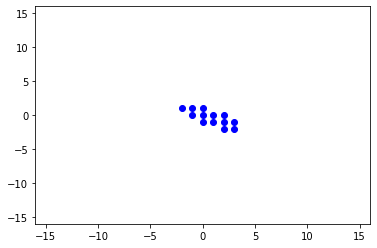

Generation 71

Mutation


Epoch 1/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4050 - accuracy: 0.8705
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 0.4046 - accuracy: 0.8711
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4043 - accuracy: 0.8712
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4040 - accuracy: 0.8714
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4036 - accuracy: 0.8715
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.4033 - accuracy: 0.8715
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4030 - accuracy: 0.8716
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4027 - accuracy: 0.8716
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4023 - accuracy: 0.8717
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4020 - accuracy: 

1/1 [==============================] - 0s 19ms/step - loss: 0.3800 - accuracy: 0.8756
Epoch 84/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3797 - accuracy: 0.8756
Epoch 85/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3794 - accuracy: 0.8756
Epoch 86/100
1/1 [==============================] - 0s 17ms/step - loss: 0.3791 - accuracy: 0.8758
Epoch 87/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3788 - accuracy: 0.8758
Epoch 88/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3785 - accuracy: 0.8757
Epoch 89/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3782 - accuracy: 0.8757
Epoch 90/100
1/1 [==============================] - 0s 21ms/step - loss: 0.3780 - accuracy: 0.8759
Epoch 91/100
1/1 [==============================] - 0s 21ms/step - loss: 0.3777 - accuracy: 0.8759
Epoch 92/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3774 - accuracy: 0.8760
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.3552 - accuracy: 0.8882
Epoch 66/100
1/1 [==============================] - 0s 17ms/step - loss: 0.3549 - accuracy: 0.8882
Epoch 67/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3546 - accuracy: 0.8882
Epoch 68/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3544 - accuracy: 0.8883
Epoch 69/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3541 - accuracy: 0.8884
Epoch 70/100
1/1 [==============================] - 0s 17ms/step - loss: 0.3538 - accuracy: 0.8885
Epoch 71/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3535 - accuracy: 0.8884
Epoch 72/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3532 - accuracy: 0.8884
Epoch 73/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3530 - accuracy: 0.8884
Epoch 74/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3527 - accuracy: 0.8885
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.3234 - accuracy: 0.9001
Epoch 48/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3231 - accuracy: 0.9002
Epoch 49/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3229 - accuracy: 0.9003
Epoch 50/100
1/1 [==============================] - 0s 21ms/step - loss: 0.3226 - accuracy: 0.9003
Epoch 51/100
1/1 [==============================] - 0s 20ms/step - loss: 0.3224 - accuracy: 0.9004
Epoch 52/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3221 - accuracy: 0.9004
Epoch 53/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3219 - accuracy: 0.9005
Epoch 54/100
1/1 [==============================] - 0s 23ms/step - loss: 0.3216 - accuracy: 0.9006
Epoch 55/100
1/1 [==============================] - 0s 20ms/step - loss: 0.3213 - accuracy: 0.9007
Epoch 56/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3211 - accuracy: 0.9007
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 0.3069 - accuracy: 0.9035
Epoch 30/100
1/1 [==============================] - 0s 22ms/step - loss: 0.3066 - accuracy: 0.9035
Epoch 31/100
1/1 [==============================] - 0s 22ms/step - loss: 0.3064 - accuracy: 0.9035
Epoch 32/100
1/1 [==============================] - 0s 23ms/step - loss: 0.3062 - accuracy: 0.9035
Epoch 33/100
1/1 [==============================] - 0s 21ms/step - loss: 0.3059 - accuracy: 0.9037
Epoch 34/100
1/1 [==============================] - 0s 21ms/step - loss: 0.3057 - accuracy: 0.9038
Epoch 35/100
1/1 [==============================] - 0s 21ms/step - loss: 0.3054 - accuracy: 0.9038
Epoch 36/100
1/1 [==============================] - 0s 20ms/step - loss: 0.3052 - accuracy: 0.9038
Epoch 37/100
1/1 [==============================] - 0s 21ms/step - loss: 0.3050 - accuracy: 0.9039
Epoch 38/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3047 - accuracy: 0.9039
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.2831 - accuracy: 0.9173
Epoch 12/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2829 - accuracy: 0.9172
Epoch 13/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2826 - accuracy: 0.9173
Epoch 14/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2824 - accuracy: 0.9173
Epoch 15/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2822 - accuracy: 0.9175
Epoch 16/100
1/1 [==============================] - 0s 22ms/step - loss: 0.2820 - accuracy: 0.9175
Epoch 17/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2817 - accuracy: 0.9175
Epoch 18/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2815 - accuracy: 0.9176
Epoch 19/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2813 - accuracy: 0.9176
Epoch 20/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2811 - accuracy: 0.9176
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.2658 - accuracy: 0.9217
Epoch 94/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2656 - accuracy: 0.9219
Epoch 95/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2654 - accuracy: 0.9219
Epoch 96/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2652 - accuracy: 0.9219
Epoch 97/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2650 - accuracy: 0.9219
Epoch 98/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2648 - accuracy: 0.9220
Epoch 99/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2646 - accuracy: 0.9222
Epoch 100/100
31/31 [==============================] - 0s 864us/step


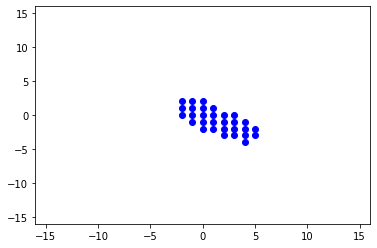

Generation 76

Mutation


Epoch 1/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2667 - accuracy: 0.9186
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 0.2665 - accuracy: 0.9186
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 0.2663 - accuracy: 0.9186
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2660 - accuracy: 0.9186
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2658 - accuracy: 0.9187
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.2656 - accuracy: 0.9187
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2654 - accuracy: 0.9189
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2652 - accuracy: 0.9190
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2650 - accuracy: 0.9190
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2647 - accuracy: 

1/1 [==============================] - 0s 20ms/step - loss: 0.2499 - accuracy: 0.9234
Epoch 84/100
1/1 [==============================] - 0s 22ms/step - loss: 0.2497 - accuracy: 0.9234
Epoch 85/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2495 - accuracy: 0.9234
Epoch 86/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2493 - accuracy: 0.9234
Epoch 87/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2491 - accuracy: 0.9234
Epoch 88/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2489 - accuracy: 0.9235
Epoch 89/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2488 - accuracy: 0.9236
Epoch 90/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2486 - accuracy: 0.9236
Epoch 91/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2484 - accuracy: 0.9237
Epoch 92/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2482 - accuracy: 0.9237
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.2141 - accuracy: 0.9396
Epoch 66/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2139 - accuracy: 0.9397
Epoch 67/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2137 - accuracy: 0.9398
Epoch 68/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2136 - accuracy: 0.9398
Epoch 69/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2134 - accuracy: 0.9398
Epoch 70/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2132 - accuracy: 0.9398
Epoch 71/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2130 - accuracy: 0.9398
Epoch 72/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2129 - accuracy: 0.9399
Epoch 73/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2127 - accuracy: 0.9401
Epoch 74/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2125 - accuracy: 0.9401
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.2063 - accuracy: 0.9409
Epoch 48/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2061 - accuracy: 0.9409
Epoch 49/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2059 - accuracy: 0.9409
Epoch 50/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2058 - accuracy: 0.9410
Epoch 51/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2056 - accuracy: 0.9410
Epoch 52/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2055 - accuracy: 0.9412
Epoch 53/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2053 - accuracy: 0.9411
Epoch 54/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2052 - accuracy: 0.9411
Epoch 55/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2050 - accuracy: 0.9411
Epoch 56/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2049 - accuracy: 0.9412
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.1912 - accuracy: 0.9454
Epoch 30/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1910 - accuracy: 0.9455
Epoch 31/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1909 - accuracy: 0.9455
Epoch 32/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1907 - accuracy: 0.9455
Epoch 33/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1906 - accuracy: 0.9456
Epoch 34/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1904 - accuracy: 0.9457
Epoch 35/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1903 - accuracy: 0.9459
Epoch 36/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1901 - accuracy: 0.9459
Epoch 37/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1900 - accuracy: 0.9460
Epoch 38/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1898 - accuracy: 0.9460
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.1829 - accuracy: 0.9488
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1828 - accuracy: 0.9488
Epoch 13/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1827 - accuracy: 0.9488
Epoch 14/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1825 - accuracy: 0.9488
Epoch 15/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1824 - accuracy: 0.9489
Epoch 16/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1823 - accuracy: 0.9489
Epoch 17/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1821 - accuracy: 0.9489
Epoch 18/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1820 - accuracy: 0.9489
Epoch 19/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1819 - accuracy: 0.9489
Epoch 20/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1817 - accuracy: 0.9489
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.1729 - accuracy: 0.9507
Epoch 94/100
1/1 [==============================] - 0s 20ms/step - loss: 0.1728 - accuracy: 0.9507
Epoch 95/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1727 - accuracy: 0.9507
Epoch 96/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1726 - accuracy: 0.9507
Epoch 97/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1725 - accuracy: 0.9507
Epoch 98/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1723 - accuracy: 0.9507
Epoch 99/100
1/1 [==============================] - 0s 20ms/step - loss: 0.1722 - accuracy: 0.9507
Epoch 100/100
31/31 [==============================] - 0s 969us/step


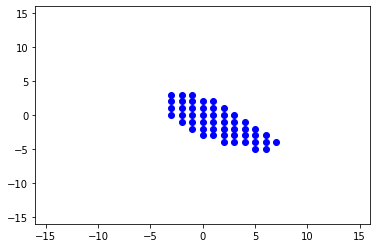

Generation 81

Mutation


Epoch 1/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1603 - accuracy: 0.9577
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1602 - accuracy: 0.9575
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1600 - accuracy: 0.9574
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1599 - accuracy: 0.9574
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1597 - accuracy: 0.9575
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1596 - accuracy: 0.9575
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1595 - accuracy: 0.9577
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1593 - accuracy: 0.9577
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1592 - accuracy: 0.9576
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1591 - accuracy: 

1/1 [==============================] - 0s 17ms/step - loss: 0.1509 - accuracy: 0.9597
Epoch 84/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1508 - accuracy: 0.9599
Epoch 85/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1507 - accuracy: 0.9599
Epoch 86/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1506 - accuracy: 0.9599
Epoch 87/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1505 - accuracy: 0.9599
Epoch 88/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1504 - accuracy: 0.9599
Epoch 89/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1503 - accuracy: 0.9601
Epoch 90/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1502 - accuracy: 0.9602
Epoch 91/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1501 - accuracy: 0.9602
Epoch 92/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1500 - accuracy: 0.9602
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 17ms/step - loss: 0.1420 - accuracy: 0.9635
Epoch 66/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1419 - accuracy: 0.9635
Epoch 67/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1418 - accuracy: 0.9635
Epoch 68/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1417 - accuracy: 0.9635
Epoch 69/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1416 - accuracy: 0.9636
Epoch 70/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1415 - accuracy: 0.9636
Epoch 71/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1414 - accuracy: 0.9636
Epoch 72/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1413 - accuracy: 0.9636
Epoch 73/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1412 - accuracy: 0.9638
Epoch 74/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1411 - accuracy: 0.9638
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.1383 - accuracy: 0.9638
Epoch 48/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1382 - accuracy: 0.9638
Epoch 49/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1381 - accuracy: 0.9638
Epoch 50/100
1/1 [==============================] - 0s 21ms/step - loss: 0.1380 - accuracy: 0.9637
Epoch 51/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1379 - accuracy: 0.9637
Epoch 52/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1378 - accuracy: 0.9638
Epoch 53/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1377 - accuracy: 0.9638
Epoch 54/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1376 - accuracy: 0.9638
Epoch 55/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1376 - accuracy: 0.9638
Epoch 56/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1375 - accuracy: 0.9638
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.1230 - accuracy: 0.9696
Epoch 30/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1229 - accuracy: 0.9696
Epoch 31/100
1/1 [==============================] - 0s 16ms/step - loss: 0.1228 - accuracy: 0.9696
Epoch 32/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1227 - accuracy: 0.9696
Epoch 33/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1226 - accuracy: 0.9696
Epoch 34/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1225 - accuracy: 0.9696
Epoch 35/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1224 - accuracy: 0.9696
Epoch 36/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1224 - accuracy: 0.9696
Epoch 37/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1223 - accuracy: 0.9697
Epoch 38/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1222 - accuracy: 0.9697
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.1218 - accuracy: 0.9689
Epoch 12/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1217 - accuracy: 0.9689
Epoch 13/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1216 - accuracy: 0.9689
Epoch 14/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1215 - accuracy: 0.9689
Epoch 15/100
1/1 [==============================] - 0s 20ms/step - loss: 0.1214 - accuracy: 0.9689
Epoch 16/100
1/1 [==============================] - 0s 22ms/step - loss: 0.1213 - accuracy: 0.9689
Epoch 17/100
1/1 [==============================] - 0s 24ms/step - loss: 0.1212 - accuracy: 0.9689
Epoch 18/100
1/1 [==============================] - 0s 22ms/step - loss: 0.1211 - accuracy: 0.9690
Epoch 19/100
1/1 [==============================] - 0s 22ms/step - loss: 0.1210 - accuracy: 0.9692
Epoch 20/100
1/1 [==============================] - 0s 23ms/step - loss: 0.1210 - accuracy: 0.9692
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.1151 - accuracy: 0.9708
Epoch 94/100
1/1 [==============================] - 0s 22ms/step - loss: 0.1150 - accuracy: 0.9708
Epoch 95/100
1/1 [==============================] - 0s 20ms/step - loss: 0.1150 - accuracy: 0.9708
Epoch 96/100
1/1 [==============================] - 0s 22ms/step - loss: 0.1149 - accuracy: 0.9708
Epoch 97/100
1/1 [==============================] - 0s 23ms/step - loss: 0.1148 - accuracy: 0.9709
Epoch 98/100
1/1 [==============================] - 0s 23ms/step - loss: 0.1147 - accuracy: 0.9709
Epoch 99/100
1/1 [==============================] - 0s 22ms/step - loss: 0.1147 - accuracy: 0.9709
Epoch 100/100
31/31 [==============================] - 0s 906us/step


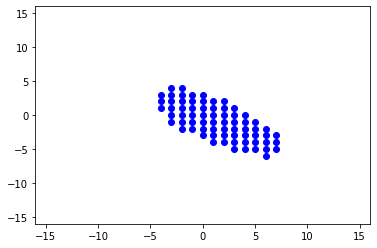

Generation 86

Mutation


Epoch 1/100
1/1 [==============================] - 0s 20ms/step - loss: 0.1062 - accuracy: 0.9747
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1061 - accuracy: 0.9747
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1060 - accuracy: 0.9747
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1060 - accuracy: 0.9747
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1059 - accuracy: 0.9747
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1058 - accuracy: 0.9748
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 0.1057 - accuracy: 0.9748
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1056 - accuracy: 0.9748
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1055 - accuracy: 0.9748
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1055 - accuracy: 

1/1 [==============================] - 0s 17ms/step - loss: 0.1004 - accuracy: 0.9753
Epoch 84/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1003 - accuracy: 0.9753
Epoch 85/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1002 - accuracy: 0.9753
Epoch 86/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1002 - accuracy: 0.9753
Epoch 87/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1001 - accuracy: 0.9753
Epoch 88/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1000 - accuracy: 0.9753
Epoch 89/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1000 - accuracy: 0.9753
Epoch 90/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0999 - accuracy: 0.9754
Epoch 91/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0998 - accuracy: 0.9754
Epoch 92/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0998 - accuracy: 0.9754
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.0984 - accuracy: 0.9758
Epoch 66/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0984 - accuracy: 0.9758
Epoch 67/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0983 - accuracy: 0.9758
Epoch 68/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0983 - accuracy: 0.9758
Epoch 69/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0982 - accuracy: 0.9758
Epoch 70/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0981 - accuracy: 0.9758
Epoch 71/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0981 - accuracy: 0.9758
Epoch 72/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0980 - accuracy: 0.9758
Epoch 73/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0980 - accuracy: 0.9758
Epoch 74/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0979 - accuracy: 0.9758
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.0861 - accuracy: 0.9782
Epoch 48/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0860 - accuracy: 0.9782
Epoch 49/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0859 - accuracy: 0.9782
Epoch 50/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0859 - accuracy: 0.9782
Epoch 51/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0858 - accuracy: 0.9782
Epoch 52/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0858 - accuracy: 0.9782
Epoch 53/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0857 - accuracy: 0.9782
Epoch 54/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0856 - accuracy: 0.9782
Epoch 55/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0856 - accuracy: 0.9783
Epoch 56/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0855 - accuracy: 0.9783
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0813 - accuracy: 0.9805
Epoch 30/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0812 - accuracy: 0.9805
Epoch 31/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0812 - accuracy: 0.9806
Epoch 32/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0811 - accuracy: 0.9806
Epoch 33/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0811 - accuracy: 0.9807
Epoch 34/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0810 - accuracy: 0.9807
Epoch 35/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0810 - accuracy: 0.9807
Epoch 36/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0809 - accuracy: 0.9807
Epoch 37/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0809 - accuracy: 0.9807
Epoch 38/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0808 - accuracy: 0.9807
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.0743 - accuracy: 0.9819
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0742 - accuracy: 0.9819
Epoch 13/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0742 - accuracy: 0.9819
Epoch 14/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0741 - accuracy: 0.9819
Epoch 15/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0741 - accuracy: 0.9819
Epoch 16/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0740 - accuracy: 0.9819
Epoch 17/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0739 - accuracy: 0.9819
Epoch 18/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0739 - accuracy: 0.9819
Epoch 19/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0738 - accuracy: 0.9819
Epoch 20/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0738 - accuracy: 0.9819
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.0700 - accuracy: 0.9828
Epoch 94/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0700 - accuracy: 0.9828
Epoch 95/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0699 - accuracy: 0.9828
Epoch 96/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0699 - accuracy: 0.9828
Epoch 97/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0698 - accuracy: 0.9828
Epoch 98/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0698 - accuracy: 0.9828
Epoch 99/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0697 - accuracy: 0.9828
Epoch 100/100
31/31 [==============================] - 0s 1ms/step


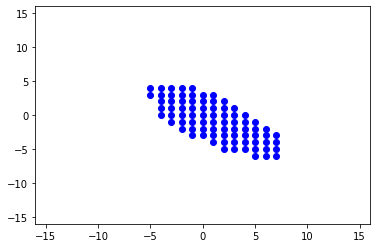

Generation 91

Mutation


Epoch 1/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0810 - accuracy: 0.9779
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0809 - accuracy: 0.9780
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0807 - accuracy: 0.9782
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0806 - accuracy: 0.9785
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0805 - accuracy: 0.9785
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0804 - accuracy: 0.9786
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0803 - accuracy: 0.9786
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0802 - accuracy: 0.9786
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0801 - accuracy: 0.9786
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0800 - accuracy: 

1/1 [==============================] - 0s 18ms/step - loss: 0.0756 - accuracy: 0.9814
Epoch 84/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0756 - accuracy: 0.9814
Epoch 85/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0755 - accuracy: 0.9815
Epoch 86/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0755 - accuracy: 0.9815
Epoch 87/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0754 - accuracy: 0.9815
Epoch 88/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0753 - accuracy: 0.9815
Epoch 89/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0753 - accuracy: 0.9815
Epoch 90/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0752 - accuracy: 0.9816
Epoch 91/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0752 - accuracy: 0.9816
Epoch 92/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0751 - accuracy: 0.9816
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 0.0577 - accuracy: 0.9880
Epoch 66/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0577 - accuracy: 0.9880
Epoch 67/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0576 - accuracy: 0.9880
Epoch 68/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0576 - accuracy: 0.9880
Epoch 69/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0575 - accuracy: 0.9880
Epoch 70/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0575 - accuracy: 0.9880
Epoch 71/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0575 - accuracy: 0.9880
Epoch 72/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0574 - accuracy: 0.9880
Epoch 73/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0574 - accuracy: 0.9880
Epoch 74/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0573 - accuracy: 0.9880
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 0.0586 - accuracy: 0.9866
Epoch 48/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0585 - accuracy: 0.9866
Epoch 49/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0585 - accuracy: 0.9866
Epoch 50/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0584 - accuracy: 0.9866
Epoch 51/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0584 - accuracy: 0.9866
Epoch 52/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0583 - accuracy: 0.9867
Epoch 53/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0583 - accuracy: 0.9868
Epoch 54/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0582 - accuracy: 0.9868
Epoch 55/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0582 - accuracy: 0.9869
Epoch 56/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0581 - accuracy: 0.9869
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0509 - accuracy: 0.9898
Epoch 30/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0509 - accuracy: 0.9898
Epoch 31/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0508 - accuracy: 0.9898
Epoch 32/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0508 - accuracy: 0.9898
Epoch 33/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0508 - accuracy: 0.9898
Epoch 34/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0507 - accuracy: 0.9898
Epoch 35/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0507 - accuracy: 0.9898
Epoch 36/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0507 - accuracy: 0.9898
Epoch 37/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0506 - accuracy: 0.9898
Epoch 38/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0506 - accuracy: 0.9898
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0483 - accuracy: 0.9901
Epoch 12/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0482 - accuracy: 0.9901
Epoch 13/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0482 - accuracy: 0.9901
Epoch 14/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0482 - accuracy: 0.9901
Epoch 15/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0481 - accuracy: 0.9901
Epoch 16/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0481 - accuracy: 0.9901
Epoch 17/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0480 - accuracy: 0.9901
Epoch 18/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0480 - accuracy: 0.9901
Epoch 19/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0479 - accuracy: 0.9901
Epoch 20/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0479 - accuracy: 0.9901
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0452 - accuracy: 0.9916
Epoch 94/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0452 - accuracy: 0.9916
Epoch 95/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0452 - accuracy: 0.9917
Epoch 96/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0451 - accuracy: 0.9918
Epoch 97/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0451 - accuracy: 0.9918
Epoch 98/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0451 - accuracy: 0.9918
Epoch 99/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0450 - accuracy: 0.9918
Epoch 100/100
31/31 [==============================] - 0s 1ms/step


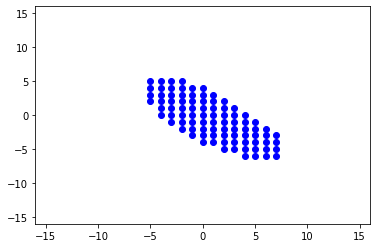

Generation 96

Mutation


Epoch 1/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0438 - accuracy: 0.9916
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0438 - accuracy: 0.9916
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0438 - accuracy: 0.9916
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0437 - accuracy: 0.9916
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0437 - accuracy: 0.9916
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0437 - accuracy: 0.9916
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0436 - accuracy: 0.9916
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0436 - accuracy: 0.9916
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0436 - accuracy: 0.9916
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0436 - accuracy: 

1/1 [==============================] - 0s 21ms/step - loss: 0.0415 - accuracy: 0.9919
Epoch 84/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0415 - accuracy: 0.9919
Epoch 85/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0415 - accuracy: 0.9919
Epoch 86/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0415 - accuracy: 0.9919
Epoch 87/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0414 - accuracy: 0.9919
Epoch 88/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0414 - accuracy: 0.9919
Epoch 89/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0414 - accuracy: 0.9919
Epoch 90/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0413 - accuracy: 0.9919
Epoch 91/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0413 - accuracy: 0.9919
Epoch 92/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0413 - accuracy: 0.9919
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0387 - accuracy: 0.9933
Epoch 66/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0386 - accuracy: 0.9933
Epoch 67/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0386 - accuracy: 0.9934
Epoch 68/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0386 - accuracy: 0.9934
Epoch 69/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0386 - accuracy: 0.9934
Epoch 70/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0385 - accuracy: 0.9934
Epoch 71/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0385 - accuracy: 0.9934
Epoch 72/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0385 - accuracy: 0.9934
Epoch 73/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0385 - accuracy: 0.9934
Epoch 74/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0384 - accuracy: 0.9934
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0382 - accuracy: 0.9936
Epoch 48/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0382 - accuracy: 0.9936
Epoch 49/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0381 - accuracy: 0.9936
Epoch 50/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0381 - accuracy: 0.9936
Epoch 51/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0381 - accuracy: 0.9936
Epoch 52/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0380 - accuracy: 0.9937
Epoch 53/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0380 - accuracy: 0.9937
Epoch 54/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0380 - accuracy: 0.9937
Epoch 55/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0380 - accuracy: 0.9937
Epoch 56/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0379 - accuracy: 0.9937
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0325 - accuracy: 0.9955
Epoch 30/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0324 - accuracy: 0.9955
Epoch 31/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0324 - accuracy: 0.9955
Epoch 32/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0324 - accuracy: 0.9955
Epoch 33/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0324 - accuracy: 0.9955
Epoch 34/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0323 - accuracy: 0.9955
Epoch 35/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0323 - accuracy: 0.9955
Epoch 36/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0323 - accuracy: 0.9955
Epoch 37/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0323 - accuracy: 0.9955
Epoch 38/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0323 - accuracy: 0.9955
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0309 - accuracy: 0.9956
Epoch 12/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0309 - accuracy: 0.9956
Epoch 13/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0309 - accuracy: 0.9956
Epoch 14/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0308 - accuracy: 0.9956
Epoch 15/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0308 - accuracy: 0.9956
Epoch 16/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0308 - accuracy: 0.9956
Epoch 17/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0308 - accuracy: 0.9956
Epoch 18/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0307 - accuracy: 0.9956
Epoch 19/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0307 - accuracy: 0.9956
Epoch 20/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0307 - accuracy: 0.9957
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0293 - accuracy: 0.9962
Epoch 94/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0293 - accuracy: 0.9962
Epoch 95/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0293 - accuracy: 0.9962
Epoch 96/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0293 - accuracy: 0.9963
Epoch 97/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0292 - accuracy: 0.9963
Epoch 98/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0292 - accuracy: 0.9963
Epoch 99/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0292 - accuracy: 0.9963
Epoch 100/100
31/31 [==============================] - 0s 1ms/step


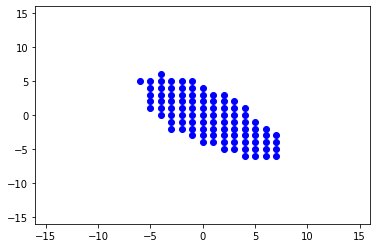

Generation 101

Mutation


Epoch 1/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0305 - accuracy: 0.9958
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0305 - accuracy: 0.9958
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0304 - accuracy: 0.9958
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0304 - accuracy: 0.9958
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0304 - accuracy: 0.9958
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0304 - accuracy: 0.9958
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0303 - accuracy: 0.9958
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0303 - accuracy: 0.9959
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 0.9959
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0303 - accuracy:

1/1 [==============================] - 0s 22ms/step - loss: 0.0287 - accuracy: 0.9963
Epoch 84/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0287 - accuracy: 0.9963
Epoch 85/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0286 - accuracy: 0.9963
Epoch 86/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0286 - accuracy: 0.9963
Epoch 87/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0286 - accuracy: 0.9963
Epoch 88/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0286 - accuracy: 0.9964
Epoch 89/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0286 - accuracy: 0.9964
Epoch 90/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0285 - accuracy: 0.9964
Epoch 91/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0285 - accuracy: 0.9964
Epoch 92/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0285 - accuracy: 0.9964
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0258 - accuracy: 0.9969
Epoch 66/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0257 - accuracy: 0.9969
Epoch 67/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0257 - accuracy: 0.9969
Epoch 68/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0257 - accuracy: 0.9969
Epoch 69/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0257 - accuracy: 0.9969
Epoch 70/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0257 - accuracy: 0.9969
Epoch 71/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0257 - accuracy: 0.9969
Epoch 72/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0257 - accuracy: 0.9969
Epoch 73/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0256 - accuracy: 0.9969
Epoch 74/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0256 - accuracy: 0.9969
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0239 - accuracy: 0.9967
Epoch 48/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0239 - accuracy: 0.9967
Epoch 49/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0239 - accuracy: 0.9967
Epoch 50/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0239 - accuracy: 0.9967
Epoch 51/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0239 - accuracy: 0.9967
Epoch 52/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0239 - accuracy: 0.9967
Epoch 53/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0239 - accuracy: 0.9967
Epoch 54/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0238 - accuracy: 0.9967
Epoch 55/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0238 - accuracy: 0.9967
Epoch 56/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0238 - accuracy: 0.9967
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0227 - accuracy: 0.9971
Epoch 30/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0227 - accuracy: 0.9971
Epoch 31/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0227 - accuracy: 0.9971
Epoch 32/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0227 - accuracy: 0.9971
Epoch 33/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0227 - accuracy: 0.9971
Epoch 34/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0226 - accuracy: 0.9971
Epoch 35/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0226 - accuracy: 0.9971
Epoch 36/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0226 - accuracy: 0.9971
Epoch 37/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0226 - accuracy: 0.9971
Epoch 38/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0226 - accuracy: 0.9971
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0204 - accuracy: 0.9977
Epoch 12/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0204 - accuracy: 0.9977
Epoch 13/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0204 - accuracy: 0.9977
Epoch 14/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0204 - accuracy: 0.9977
Epoch 15/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0203 - accuracy: 0.9977
Epoch 16/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0203 - accuracy: 0.9977
Epoch 17/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0203 - accuracy: 0.9977
Epoch 18/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0203 - accuracy: 0.9977
Epoch 19/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0203 - accuracy: 0.9977
Epoch 20/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0203 - accuracy: 0.9977
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0195 - accuracy: 0.9979
Epoch 94/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0195 - accuracy: 0.9979
Epoch 95/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0195 - accuracy: 0.9979
Epoch 96/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0195 - accuracy: 0.9979
Epoch 97/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0195 - accuracy: 0.9979
Epoch 98/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0195 - accuracy: 0.9979
Epoch 99/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0195 - accuracy: 0.9979
Epoch 100/100
31/31 [==============================] - 0s 983us/step


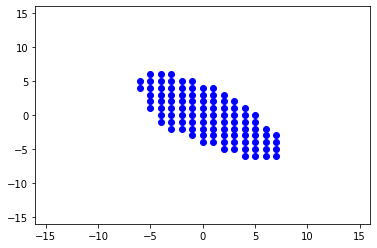

Generation 106

Mutation


Epoch 1/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0173 - accuracy: 0.9982
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0173 - accuracy: 0.9982
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0173 - accuracy: 0.9982
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0173 - accuracy: 0.9982
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0173 - accuracy: 0.9982
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0173 - accuracy: 0.9982
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0172 - accuracy: 0.9982
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0172 - accuracy: 0.9982
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0172 - accuracy: 0.9982
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0172 - accuracy:

1/1 [==============================] - 0s 22ms/step - loss: 0.0166 - accuracy: 0.9983
Epoch 84/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0166 - accuracy: 0.9983
Epoch 85/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0166 - accuracy: 0.9983
Epoch 86/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0166 - accuracy: 0.9983
Epoch 87/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0166 - accuracy: 0.9983
Epoch 88/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0165 - accuracy: 0.9983
Epoch 89/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0165 - accuracy: 0.9983
Epoch 90/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0165 - accuracy: 0.9983
Epoch 91/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0165 - accuracy: 0.9983
Epoch 92/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0165 - accuracy: 0.9983
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0172 - accuracy: 0.9978
Epoch 66/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0172 - accuracy: 0.9978
Epoch 67/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0172 - accuracy: 0.9978
Epoch 68/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0171 - accuracy: 0.9978
Epoch 69/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0171 - accuracy: 0.9978
Epoch 70/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0171 - accuracy: 0.9978
Epoch 71/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0171 - accuracy: 0.9979
Epoch 72/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0171 - accuracy: 0.9979
Epoch 73/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0171 - accuracy: 0.9979
Epoch 74/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0171 - accuracy: 0.9979
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0171 - accuracy: 0.9977
Epoch 48/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0171 - accuracy: 0.9977
Epoch 49/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0171 - accuracy: 0.9977
Epoch 50/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0171 - accuracy: 0.9977
Epoch 51/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0171 - accuracy: 0.9977
Epoch 52/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0170 - accuracy: 0.9977
Epoch 53/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0170 - accuracy: 0.9977
Epoch 54/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0170 - accuracy: 0.9977
Epoch 55/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0170 - accuracy: 0.9977
Epoch 56/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0170 - accuracy: 0.9977
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0142 - accuracy: 0.9987
Epoch 30/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0142 - accuracy: 0.9987
Epoch 31/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0142 - accuracy: 0.9987
Epoch 32/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0142 - accuracy: 0.9987
Epoch 33/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0142 - accuracy: 0.9987
Epoch 34/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0142 - accuracy: 0.9988
Epoch 35/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0142 - accuracy: 0.9988
Epoch 36/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0142 - accuracy: 0.9988
Epoch 37/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0142 - accuracy: 0.9988
Epoch 38/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0142 - accuracy: 0.9988
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0142 - accuracy: 0.9987
Epoch 12/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0142 - accuracy: 0.9987
Epoch 13/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0142 - accuracy: 0.9987
Epoch 14/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0141 - accuracy: 0.9987
Epoch 15/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0141 - accuracy: 0.9987
Epoch 16/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0141 - accuracy: 0.9987
Epoch 17/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0141 - accuracy: 0.9987
Epoch 18/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0141 - accuracy: 0.9987
Epoch 19/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0141 - accuracy: 0.9987
Epoch 20/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0141 - accuracy: 0.9987
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 25ms/step - loss: 0.0136 - accuracy: 0.9988
Epoch 94/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0136 - accuracy: 0.9988
Epoch 95/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0136 - accuracy: 0.9988
Epoch 96/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0136 - accuracy: 0.9988
Epoch 97/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0136 - accuracy: 0.9988
Epoch 98/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0135 - accuracy: 0.9988
Epoch 99/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0135 - accuracy: 0.9988
Epoch 100/100
31/31 [==============================] - 0s 931us/step


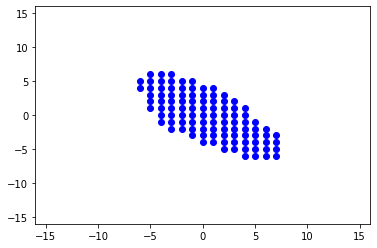

Generation 111

Mutation


Epoch 1/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0123 - accuracy: 0.9984
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0123 - accuracy: 0.9984
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0123 - accuracy: 0.9985
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0123 - accuracy: 0.9985
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0123 - accuracy: 0.9985
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0123 - accuracy: 0.9985
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0123 - accuracy: 0.9985
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0123 - accuracy: 0.9985
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0123 - accuracy: 0.9985
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0123 - accuracy:

1/1 [==============================] - 0s 18ms/step - loss: 0.0119 - accuracy: 0.9986
Epoch 84/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0118 - accuracy: 0.9986
Epoch 85/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0118 - accuracy: 0.9986
Epoch 86/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0118 - accuracy: 0.9986
Epoch 87/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0118 - accuracy: 0.9986
Epoch 88/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0118 - accuracy: 0.9986
Epoch 89/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0118 - accuracy: 0.9986
Epoch 90/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0118 - accuracy: 0.9986
Epoch 91/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0118 - accuracy: 0.9986
Epoch 92/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0118 - accuracy: 0.9986
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0117 - accuracy: 0.9986
Epoch 66/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0117 - accuracy: 0.9986
Epoch 67/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0117 - accuracy: 0.9986
Epoch 68/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0117 - accuracy: 0.9986
Epoch 69/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0117 - accuracy: 0.9986
Epoch 70/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0117 - accuracy: 0.9986
Epoch 71/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0117 - accuracy: 0.9987
Epoch 72/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0117 - accuracy: 0.9987
Epoch 73/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0117 - accuracy: 0.9987
Epoch 74/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0117 - accuracy: 0.9987
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 0.0108 - accuracy: 0.9988
Epoch 48/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0108 - accuracy: 0.9988
Epoch 49/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0108 - accuracy: 0.9988
Epoch 50/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0108 - accuracy: 0.9988
Epoch 51/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0108 - accuracy: 0.9988
Epoch 52/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0108 - accuracy: 0.9988
Epoch 53/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0108 - accuracy: 0.9988
Epoch 54/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0108 - accuracy: 0.9988
Epoch 55/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0108 - accuracy: 0.9988
Epoch 56/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0107 - accuracy: 0.9988
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0107 - accuracy: 0.9985
Epoch 30/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0107 - accuracy: 0.9985
Epoch 31/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0107 - accuracy: 0.9985
Epoch 32/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0107 - accuracy: 0.9985
Epoch 33/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0107 - accuracy: 0.9985
Epoch 34/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0107 - accuracy: 0.9985
Epoch 35/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0107 - accuracy: 0.9985
Epoch 36/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0107 - accuracy: 0.9985
Epoch 37/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0106 - accuracy: 0.9985
Epoch 38/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0106 - accuracy: 0.9985
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0100 - accuracy: 0.9991
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0100 - accuracy: 0.9991
Epoch 13/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0100 - accuracy: 0.9991
Epoch 14/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0100 - accuracy: 0.9991
Epoch 15/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0099 - accuracy: 0.9991
Epoch 16/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0099 - accuracy: 0.9991
Epoch 17/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0099 - accuracy: 0.9991
Epoch 18/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0099 - accuracy: 0.9991
Epoch 19/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0099 - accuracy: 0.9991
Epoch 20/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0099 - accuracy: 0.9991
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0096 - accuracy: 0.9991
Epoch 94/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0096 - accuracy: 0.9991
Epoch 95/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0096 - accuracy: 0.9991
Epoch 96/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0096 - accuracy: 0.9991
Epoch 97/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0096 - accuracy: 0.9991
Epoch 98/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0096 - accuracy: 0.9991
Epoch 99/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0096 - accuracy: 0.9991
Epoch 100/100
31/31 [==============================] - 0s 1ms/step


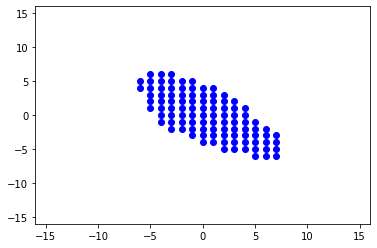

Generation 116

Mutation


Epoch 1/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0085 - accuracy: 0.9994
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0085 - accuracy: 0.9994
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0085 - accuracy: 0.9994
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0085 - accuracy: 0.9994
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0085 - accuracy: 0.9994
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0085 - accuracy: 0.9994
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0085 - accuracy: 0.9994
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0085 - accuracy: 0.9994
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0085 - accuracy: 0.9994
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0085 - accuracy:

1/1 [==============================] - 0s 20ms/step - loss: 0.0082 - accuracy: 0.9994
Epoch 84/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0082 - accuracy: 0.9994
Epoch 85/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0082 - accuracy: 0.9994
Epoch 86/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0082 - accuracy: 0.9994
Epoch 87/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0082 - accuracy: 0.9994
Epoch 88/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0082 - accuracy: 0.9994
Epoch 89/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0082 - accuracy: 0.9994
Epoch 90/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0082 - accuracy: 0.9994
Epoch 91/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0081 - accuracy: 0.9994
Epoch 92/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0081 - accuracy: 0.9995
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0083 - accuracy: 0.9992
Epoch 66/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0083 - accuracy: 0.9992
Epoch 67/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0083 - accuracy: 0.9992
Epoch 68/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0082 - accuracy: 0.9992
Epoch 69/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0082 - accuracy: 0.9992
Epoch 70/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0082 - accuracy: 0.9992
Epoch 71/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0082 - accuracy: 0.9992
Epoch 72/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0082 - accuracy: 0.9992
Epoch 73/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0082 - accuracy: 0.9992
Epoch 74/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0082 - accuracy: 0.9992
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0073 - accuracy: 0.9995
Epoch 48/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0073 - accuracy: 0.9995
Epoch 49/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0073 - accuracy: 0.9995
Epoch 50/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0073 - accuracy: 0.9995
Epoch 51/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0073 - accuracy: 0.9995
Epoch 52/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0072 - accuracy: 0.9995
Epoch 53/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0072 - accuracy: 0.9995
Epoch 54/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0072 - accuracy: 0.9995
Epoch 55/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0072 - accuracy: 0.9995
Epoch 56/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0072 - accuracy: 0.9995
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0065 - accuracy: 0.9997
Epoch 30/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0065 - accuracy: 0.9997
Epoch 31/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0065 - accuracy: 0.9997
Epoch 32/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0064 - accuracy: 0.9997
Epoch 33/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0064 - accuracy: 0.9997
Epoch 34/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0064 - accuracy: 0.9997
Epoch 35/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0064 - accuracy: 0.9997
Epoch 36/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0064 - accuracy: 0.9997
Epoch 37/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0064 - accuracy: 0.9997
Epoch 38/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0064 - accuracy: 0.9997
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0071 - accuracy: 0.9992
Epoch 12/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0071 - accuracy: 0.9992
Epoch 13/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0071 - accuracy: 0.9992
Epoch 14/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0071 - accuracy: 0.9992
Epoch 15/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0071 - accuracy: 0.9992
Epoch 16/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0071 - accuracy: 0.9992
Epoch 17/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0071 - accuracy: 0.9992
Epoch 18/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0071 - accuracy: 0.9992
Epoch 19/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0071 - accuracy: 0.9992
Epoch 20/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0071 - accuracy: 0.9992
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0068 - accuracy: 0.9993
Epoch 94/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0068 - accuracy: 0.9993
Epoch 95/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0068 - accuracy: 0.9993
Epoch 96/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0068 - accuracy: 0.9993
Epoch 97/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0068 - accuracy: 0.9993
Epoch 98/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0068 - accuracy: 0.9993
Epoch 99/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0068 - accuracy: 0.9993
Epoch 100/100
31/31 [==============================] - 0s 1ms/step


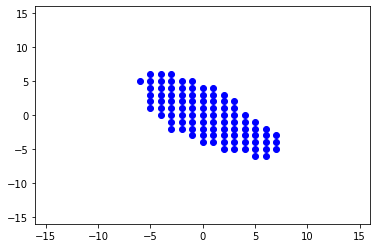

Generation 121

Mutation


Epoch 1/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0062 - accuracy: 0.9992
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0062 - accuracy: 0.9992
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0062 - accuracy: 0.9993
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0062 - accuracy: 0.9993
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0062 - accuracy: 0.9993
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0062 - accuracy: 0.9993
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0062 - accuracy: 0.9993
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0062 - accuracy: 0.9993
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0062 - accuracy: 0.9993
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0062 - accuracy:

1/1 [==============================] - 0s 21ms/step - loss: 0.0060 - accuracy: 0.9994
Epoch 84/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 0.9994
Epoch 85/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0060 - accuracy: 0.9994
Epoch 86/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0060 - accuracy: 0.9994
Epoch 87/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 0.9994
Epoch 88/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 0.9994
Epoch 89/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 0.9994
Epoch 90/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0060 - accuracy: 0.9994
Epoch 91/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0060 - accuracy: 0.9994
Epoch 92/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 0.9994
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 66/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 67/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 68/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 69/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 70/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 71/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 72/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 73/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 74/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0050 - accuracy: 0.9999
Epoch 48/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0050 - accuracy: 0.9999
Epoch 49/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0050 - accuracy: 0.9999
Epoch 50/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0050 - accuracy: 0.9999
Epoch 51/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0050 - accuracy: 0.9999
Epoch 52/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0050 - accuracy: 0.9999
Epoch 53/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0050 - accuracy: 0.9999
Epoch 54/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0050 - accuracy: 0.9999
Epoch 55/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0050 - accuracy: 0.9999
Epoch 56/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0050 - accuracy: 0.9999
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0053 - accuracy: 0.9996
Epoch 30/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0053 - accuracy: 0.9996
Epoch 31/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0053 - accuracy: 0.9996
Epoch 32/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0053 - accuracy: 0.9996
Epoch 33/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0052 - accuracy: 0.9996
Epoch 34/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0052 - accuracy: 0.9996
Epoch 35/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0052 - accuracy: 0.9996
Epoch 36/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0052 - accuracy: 0.9996
Epoch 37/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0052 - accuracy: 0.9996
Epoch 38/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0052 - accuracy: 0.9996
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0046 - accuracy: 0.9996
Epoch 12/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0046 - accuracy: 0.9996
Epoch 13/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0046 - accuracy: 0.9996
Epoch 14/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0046 - accuracy: 0.9996
Epoch 15/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0046 - accuracy: 0.9996
Epoch 16/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0046 - accuracy: 0.9996
Epoch 17/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0046 - accuracy: 0.9996
Epoch 18/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0046 - accuracy: 0.9996
Epoch 19/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0046 - accuracy: 0.9996
Epoch 20/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0046 - accuracy: 0.9996
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0045 - accuracy: 0.9996
Epoch 94/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0045 - accuracy: 0.9996
Epoch 95/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0045 - accuracy: 0.9996
Epoch 96/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0045 - accuracy: 0.9996
Epoch 97/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0045 - accuracy: 0.9996
Epoch 98/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0045 - accuracy: 0.9996
Epoch 99/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0045 - accuracy: 0.9996
Epoch 100/100
31/31 [==============================] - 0s 1ms/step


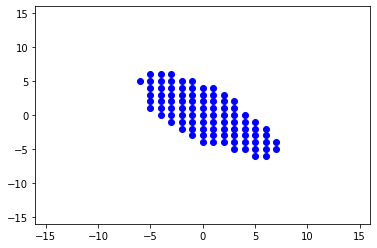

Generation 126

Mutation


Epoch 1/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0044 - accuracy: 0.9998
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0044 - accuracy: 0.9998
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0044 - accuracy: 0.9998
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0044 - accuracy: 0.9998
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0044 - accuracy: 0.9998
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0044 - accuracy: 0.9998
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0044 - accuracy: 0.9998
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0044 - accuracy: 0.9998
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0044 - accuracy: 0.9998
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0044 - accuracy:

1/1 [==============================] - 0s 20ms/step - loss: 0.0043 - accuracy: 0.9998
Epoch 84/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0043 - accuracy: 0.9998
Epoch 85/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0043 - accuracy: 0.9998
Epoch 86/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0043 - accuracy: 0.9998
Epoch 87/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0043 - accuracy: 0.9998
Epoch 88/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0043 - accuracy: 0.9998
Epoch 89/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0043 - accuracy: 0.9998
Epoch 90/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0043 - accuracy: 0.9998
Epoch 91/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0043 - accuracy: 0.9998
Epoch 92/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0043 - accuracy: 0.9998
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0039 - accuracy: 0.9998
Epoch 48/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0039 - accuracy: 0.9998
Epoch 49/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0039 - accuracy: 0.9998
Epoch 50/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 0.9998
Epoch 51/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0039 - accuracy: 0.9998
Epoch 52/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0039 - accuracy: 0.9998
Epoch 53/100
1/1 [==============================] - 0s 48ms/step - loss: 0.0039 - accuracy: 0.9998
Epoch 54/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 0.9998
Epoch 55/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0039 - accuracy: 0.9998
Epoch 56/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0039 - accuracy: 0.9998
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0042 - accuracy: 0.9997
Epoch 30/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0042 - accuracy: 0.9997
Epoch 31/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0042 - accuracy: 0.9997
Epoch 32/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0042 - accuracy: 0.9997
Epoch 33/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0042 - accuracy: 0.9997
Epoch 34/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0042 - accuracy: 0.9997
Epoch 35/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0042 - accuracy: 0.9997
Epoch 36/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0042 - accuracy: 0.9997
Epoch 37/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0042 - accuracy: 0.9997
Epoch 38/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0042 - accuracy: 0.9997
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0036 - accuracy: 0.9999
Epoch 12/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0036 - accuracy: 0.9999
Epoch 13/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0036 - accuracy: 0.9999
Epoch 14/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0036 - accuracy: 0.9999
Epoch 15/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0036 - accuracy: 0.9999
Epoch 16/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0036 - accuracy: 0.9999
Epoch 17/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0036 - accuracy: 0.9999
Epoch 18/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0036 - accuracy: 0.9999
Epoch 19/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0036 - accuracy: 0.9999
Epoch 20/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0036 - accuracy: 0.9999
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0035 - accuracy: 0.9999
Epoch 94/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0035 - accuracy: 0.9999
Epoch 95/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0035 - accuracy: 0.9999
Epoch 96/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0035 - accuracy: 0.9999
Epoch 97/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - accuracy: 0.9999
Epoch 98/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0035 - accuracy: 0.9999
Epoch 99/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 0.9999
Epoch 100/100
31/31 [==============================] - 0s 1ms/step


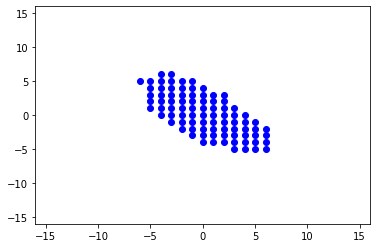

Generation 131

Mutation


Epoch 1/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0035 - accuracy: 0.9998
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0035 - accuracy: 0.9998
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0035 - accuracy: 0.9998
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0035 - accuracy: 0.9998
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0035 - accuracy: 0.9998
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0035 - accuracy: 0.9998
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0035 - accuracy: 0.9998
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0035 - accuracy: 0.9998
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0035 - accuracy: 0.9998
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0035 - accuracy:

1/1 [==============================] - 0s 19ms/step - loss: 0.0034 - accuracy: 0.9998
Epoch 84/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0034 - accuracy: 0.9998
Epoch 85/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0034 - accuracy: 0.9998
Epoch 86/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0034 - accuracy: 0.9998
Epoch 87/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0034 - accuracy: 0.9998
Epoch 88/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 0.9998
Epoch 89/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0034 - accuracy: 0.9998
Epoch 90/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0034 - accuracy: 0.9998
Epoch 91/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 0.9998
Epoch 92/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0034 - accuracy: 0.9998
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 48/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 49/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 50/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 51/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 52/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 53/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 54/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 55/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 56/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0033 - accuracy: 0.9998
Epoch 30/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0033 - accuracy: 0.9998
Epoch 31/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0033 - accuracy: 0.9998
Epoch 32/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0033 - accuracy: 0.9998
Epoch 33/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0033 - accuracy: 0.9998
Epoch 34/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0033 - accuracy: 0.9998
Epoch 35/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0033 - accuracy: 0.9998
Epoch 36/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0033 - accuracy: 0.9998
Epoch 37/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0033 - accuracy: 0.9998
Epoch 38/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0033 - accuracy: 0.9998
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0029 - accuracy: 0.9998
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0029 - accuracy: 0.9998
Epoch 13/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0029 - accuracy: 0.9998
Epoch 14/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0029 - accuracy: 0.9998
Epoch 15/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0029 - accuracy: 0.9998
Epoch 16/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0029 - accuracy: 0.9998
Epoch 17/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0029 - accuracy: 0.9998
Epoch 18/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0029 - accuracy: 0.9998
Epoch 19/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0029 - accuracy: 0.9998
Epoch 20/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0029 - accuracy: 0.9998
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0028 - accuracy: 0.9998
Epoch 94/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0028 - accuracy: 0.9998
Epoch 95/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0028 - accuracy: 0.9998
Epoch 96/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0028 - accuracy: 0.9998
Epoch 97/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0028 - accuracy: 0.9998
Epoch 98/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 0.9998
Epoch 99/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 0.9998
Epoch 100/100
31/31 [==============================] - 0s 1ms/step


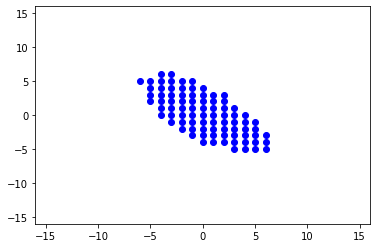

Generation 136

Mutation


Epoch 1/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0031 - accuracy:

1/1 [==============================] - 0s 20ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 84/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 85/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 86/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 87/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 88/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 89/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 90/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 91/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 92/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0026 - accuracy: 0.9999
Epoch 48/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0026 - accuracy: 0.9999
Epoch 49/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 0.9999
Epoch 50/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0026 - accuracy: 0.9999
Epoch 51/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 0.9999
Epoch 52/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0026 - accuracy: 0.9999
Epoch 53/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0026 - accuracy: 0.9999
Epoch 54/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0026 - accuracy: 0.9999
Epoch 55/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0026 - accuracy: 0.9999
Epoch 56/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0026 - accuracy: 0.9999
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 30/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 31/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 32/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 33/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 34/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 35/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 36/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 37/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 38/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 12/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 13/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 14/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 15/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 16/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 17/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 18/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 19/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 20/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 94/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 95/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 96/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 97/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 98/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 99/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 100/100
31/31 [==============================] - 0s 911us/step


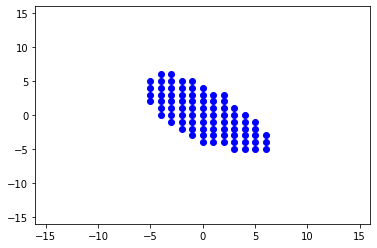

Generation 141

Mutation


Epoch 1/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0025 - accuracy:

1/1 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 84/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 85/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 86/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 87/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 88/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 89/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 90/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 91/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 92/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 48/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 49/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 50/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 51/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 52/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 53/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 54/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 55/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 56/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 30/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 31/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 32/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 33/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 34/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 35/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 36/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 37/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 38/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 12/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 13/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 14/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 15/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 16/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 17/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 18/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 19/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 20/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 94/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 95/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 96/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 97/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 98/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 99/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 100/100
31/31 [==============================] - 0s 978us/step


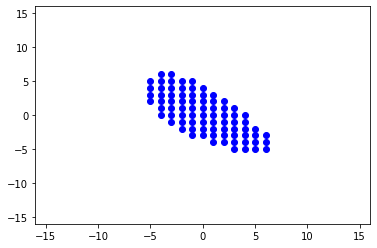

Generation 146

Mutation


Epoch 1/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy:

1/1 [==============================] - 0s 23ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 84/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 85/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 86/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 87/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 88/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 89/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 90/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 91/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 92/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 48/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 49/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 50/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 51/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 52/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 53/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 54/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 55/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 56/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 30/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 31/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 32/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 33/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 34/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 35/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 36/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 37/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 38/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 12/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 13/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 14/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 15/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 16/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 17/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 18/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 19/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 20/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 94/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 95/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 96/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 97/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 98/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 99/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 100/100
31/31 [==============================] - 0s 1ms/step


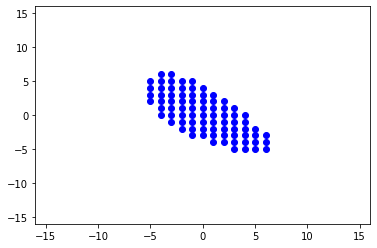

Generation 151

Mutation


Epoch 1/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy:

1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 92/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 66/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 67/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 68/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 69/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 70/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 71/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 72/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 73/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 74/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 27ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 48/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 49/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 50/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 51/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 52/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 53/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 54/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 55/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 56/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 30/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 31/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 32/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 33/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 34/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 35/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 36/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 37/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 38/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 12/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 13/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 14/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 15/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 16/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 17/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 18/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 19/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 20/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 94/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 95/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 96/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 97/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 98/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 99/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 100/100
31/31 [==============================] - 0s 1ms/step


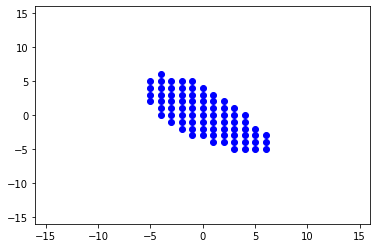

Generation 156

Mutation


Epoch 1/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy:

1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 92/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 48/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 49/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 50/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 51/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 52/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 53/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 54/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 55/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 56/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 30/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 31/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 32/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 33/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 34/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 35/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 36/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 37/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 38/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 27ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 12/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 13/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 14/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 15/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 16/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 17/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 18/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 19/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 20/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 94/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 95/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 96/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 97/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 98/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 99/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 100/100
31/31 [==============================] - 0s 1ms/step


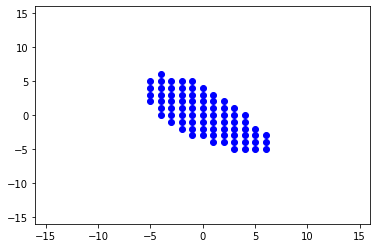

Generation 161

Mutation


Epoch 1/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy:

1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 92/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 48/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 49/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 50/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 51/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 52/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 53/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 54/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 55/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 56/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 30/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 31/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 32/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 33/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 34/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 35/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 36/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 37/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 38/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 12/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 13/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 14/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 15/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 16/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 17/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 18/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 19/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 20/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 94/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 95/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 96/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 97/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 98/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 99/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 100/100
31/31 [==============================] - 0s 991us/step


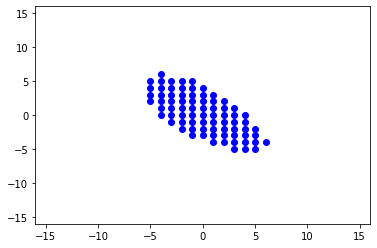

Generation 166

Mutation


Epoch 1/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy:

1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 92/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 48/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 49/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 50/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 51/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 52/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 53/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 54/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 55/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 56/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 30/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 31/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 32/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 33/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 34/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 35/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 36/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 37/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 38/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 12/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 13/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 14/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 15/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 16/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 17/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 18/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 19/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 20/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 94/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 95/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 96/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 97/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 98/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 99/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 100/100
31/31 [==============================] - 0s 1ms/step


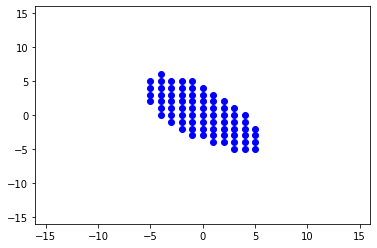

Generation 171

Mutation


Epoch 1/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy:

1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 84/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 85/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 86/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 87/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 88/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 89/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 90/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 91/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 92/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 48/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 49/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 50/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 51/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 52/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 53/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 54/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 55/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 56/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 30/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 31/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 32/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 33/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 34/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 35/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 36/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 37/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 38/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 12/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 13/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 14/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 15/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 16/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 17/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 18/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 19/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 20/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 94/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 95/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 96/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 97/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 98/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 99/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 100/100
31/31 [==============================] - 0s 921us/step


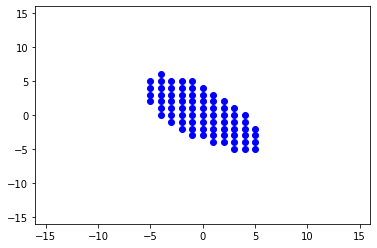

Generation 176

Mutation


Epoch 1/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy:

1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 92/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 48/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 49/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 50/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 51/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 52/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 53/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 54/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 55/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 56/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 30/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 31/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 32/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 33/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 34/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 35/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 36/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 37/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 38/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 12/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 13/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 14/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 15/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 16/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 17/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 18/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 19/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 20/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 94/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 95/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 96/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 97/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 98/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 99/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 100/100
31/31 [==============================] - 0s 1ms/step


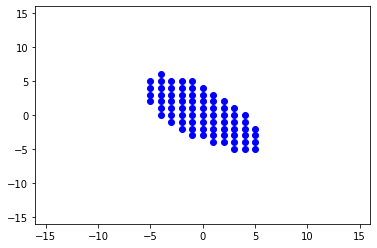

Generation 181

Mutation


Epoch 1/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy:

1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 84/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 85/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 86/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 87/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 88/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 89/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 90/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 91/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 92/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 48/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 49/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 50/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 51/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 52/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 53/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 54/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 55/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 56/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 30/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 31/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 32/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 33/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 34/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 35/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 36/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 37/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 38/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 12/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 13/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 14/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 15/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 16/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 17/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 18/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 19/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 20/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 94/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 95/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 96/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 97/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 98/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 99/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 100/100
31/31 [==============================] - 0s 969us/step


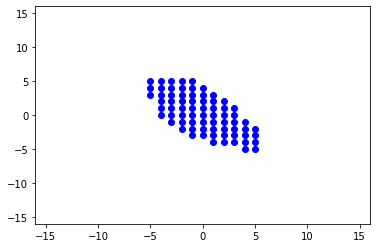

Generation 186

Mutation


Epoch 1/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy:

1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 92/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 48/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 49/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 50/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 51/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 52/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 53/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 54/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 55/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 56/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 30/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 31/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 32/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 33/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 34/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 35/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 36/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 37/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 38/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 12/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 13/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 14/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 15/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 16/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 17/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 18/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 19/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 20/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 94/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 95/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 96/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 97/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 98/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 99/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 100/100
31/31 [==============================] - 0s 999us/step


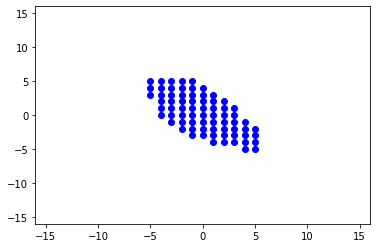

Generation 191

Mutation


Epoch 1/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy:

1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 84/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 85/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 86/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 87/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 88/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 89/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 90/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 91/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 92/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 48/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 49/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 50/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 51/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 52/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 53/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 54/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 55/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 56/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 30/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 31/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 32/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 33/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 34/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 35/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 36/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 37/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 38/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 12/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 13/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 14/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 15/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 16/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 17/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 18/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 19/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 20/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 94/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 95/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 96/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 97/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 98/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 99/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 100/100
31/31 [==============================] - 0s 963us/step


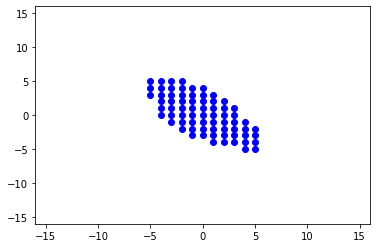

Generation 196

Mutation


Epoch 1/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy:

1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 92/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 66/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 67/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 68/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 69/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 70/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 71/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 72/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 73/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 74/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 75/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 48/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 49/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 50/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 51/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 52/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 53/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 54/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 55/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 56/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 57/100
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 30/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 31/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 32/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 33/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 34/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 35/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 36/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 37/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 38/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 39/100
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 12/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 13/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 14/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 15/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 16/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 17/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 18/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 19/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 20/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 21/100
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 94/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 95/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 96/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 97/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 98/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 99/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 100/100
31/31 [==============================] - 0s 812us/step


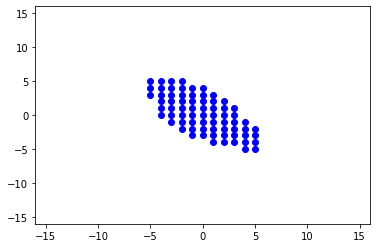

Generation 1

Mutation


Generation 2

Mutation


Generation 3

Mutation


Generation 4

Mutation


Generation 5

Mutation


Generation 6

Mutation


Generation 7

Mutation


Generation 8

Mutation


Generation 9

Mutation


Generation 10

Mutation


Generation 11

Mutation


Generation 12

Mutation


Generation 13

Mutation


Generation 14

Mutation


Generation 15

Mutation


Generation 16

Mutation


Generation 17

Mutation


Generation 18

Mutation


Generation 19

Mutation


Generation 20

Mutation


Generation 21

Mutation


Generation 22

Mutation


Generation 23

Mutation


Generation 24

Mutation


Generation 25

Mutation


Generation 26

Mutation


Generation 27

Mutation


Generation 28

Mutation


Generation 29

Mutation


Generation 30

Mutation


Generation 31

Mutation


Generation 32

Mutation


Generation 33

Mutation


Generation 34

Mutation


Generation 35

Mutation


Generation 36

Mutation


Generation 37

Mutation


Generation 38

Mutation


Generation 39

Mutati

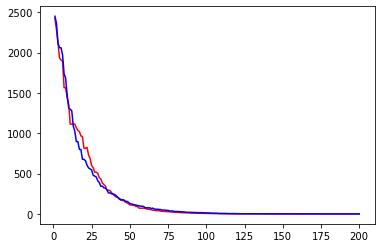

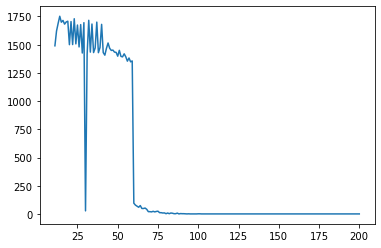

In [54]:
ppp = [(F(i),i) for i in parent]
ppp.sort()
print(ppp[:10])

# x_train=[]
# y_train=[]

train_data = []

plotting = []
gening = [i+1 for i in range(T)]

pplotting = []
ggening = [i+1 for i in range(T)]

miging = []
gggening = []



while(t<=T):
    print(f"Generation {t}")
    print()
    

    #parent = tornament(parent,2)
    #print(parent,pop)
    
    random.shuffle(parent)
    p1 = parent[:int((len(parent)+0.1)/2)]
    p2 = parent[int((len(parent)+0.1)/2):]
    
    offspring = []

    for i in range(int((len(parent)+0.1)/2)):
        a = cross(p1[i],p2[i],1)
        
        offspring.append(a[0])
        offspring.append(a[1])


    print(f"Mutation")
    print()
    #print(f"Parents:")

    
    for i in range(len(parent)):
        parent[i] = mutation_n(parent[i])

    for i in range(len(offspring)):
        offspring[i] = mutation_n(offspring[i])
        
        
    #if fi[0]==0:
    #    print(f"No Mutation happened")
    #print()
    
    pop_tot = survival(parent,offspring)
    
    
    plotting.append(pop_tot[1][0][0])
    #plot.scatter(t,f(pop_tot[1][0]))
    #plot.pause(0.01)
    #plot.show()
    
    
    #print(pop_tot)
    pop_new =  pop_tot[0]
    #print(f"Final population ->",pop_new)
    parent = list(pop_new)
    print()
    #print(pop_tot[1])
    
    
    pop_tot_len = len(pop_tot[1])
    
    for i in range(pop_tot_len//2):
        train_data.append(pop_tot[1][i])
        train_data.append(pop_tot[1][pop_tot_len-1-i])
        if t>10:
            train_data.pop(0)
            train_data.pop(0)
        
    
#     for i in pop_tot[1][:(3*len(pop_tot[1]))//4]:
#         #print(i+[t])
#         x_train.append(i+[t])
#         y_train.append(1)
#         if t>10:
#             x_train.pop(0)
#             y_train.pop(0)
#     for i in pop_tot[2][(1*len(pop_tot[2]))//4 :]:
#         x_train.append(i+[t])
#         y_train.append(0)
#         if t>10:
#             x_train.pop(0)
#             y_train.pop(0)
    #x_train = pd.DataFrame(x_train)
    #y_train = pd.DataFrame(y_train)
    
    #this is the ann classifier to train
    #print(x_train)
    #print(y_train)
    if t%5>=0:
        pull_data = list(train_data)
        pull_data.sort()
        x_train = [i[1] for i in pull_data]
        y_train = [1 for i in range(round(len(x_train)/2))] + [0 for i in range(round(len(x_train)/2))] 
        model.fit(x_train, y_train, epochs=100, batch_size=len(x_train),shuffle = True)
    if t>10:
        sisi = 0
        ran_pop = []
        for i in range(2*pop):
            a = []
            for j in range(n):
                a.append(random.randint(Limits[j][0],Limits[j][1]))
            ran_pop.append(a)
        migration = []
        #print("ran pop",ran_pop)
        ran_guess = model.predict(ran_pop)
        #print("ran guess",ran_guess)
        for i in range(len(ran_pop)):
            if ran_guess[i]>0.5:
                sisi+=1
                migration.append(r2b(ran_pop[i]))
        miging.append(sisi)
        gggening.append(t)
        
        parent+=migration
        
    if t%5>=0:
        #obj_fun_map = []
        xx = []
        yy = []
        sam_spac = []
        for i in range(-15,16):
            for j in range(-15,16):
                xxyy = [0 for iii in range(n-2)]
                sam_spac.append([i,j]+xxyy)
        sam_spac_op = model.predict(sam_spac)
        for i in range(len(sam_spac)):
            if sam_spac_op[i]>=0.5:
                xx.append(sam_spac[i][0])
                yy.append(sam_spac[i][1])
        plot.xlim(-16,16)
        plot.ylim(-16,16)
        plot.scatter(xx,yy,color="blue")
        plot.show()
    
    t+=1

t = 1

while(t<=T):
    print(f"Generation {t}")
    print()

    #parent = tornament(parent,2)
    #print(parent,pop)
    random.shuffle(pparent)
    p1 = pparent[:int((len(pparent)+0.1)/2)]
    p2 = pparent[int((len(pparent)+0.1)/2):]
    #print(p2)
    offspring = []
    #print(p1)
    #print(p2)
    #print(f"Crossover")
    #print()
    for i in range(int((len(pparent)+0.1)/2)):
        a = cross(p1[i],p2[i],1)
        
        #print(f"{p1[i]} + {p2[i]} = {a[0]} , {a[1]}")
        offspring.append(a[0])
        offspring.append(a[1])


    print(f"Mutation")
    print()
    #print(f"Parents:")
    fi = [0]
    for i in range(len(pparent)):
        pparent[i] = mutation_n(pparent[i])
#     if fi[0]==0:
#         print(f"No Mutation happened")
#     print()
#     print(f"Offsprings:")
    fi = [0]
    for i in range(len(offspring)):
        offspring[i] = mutation_n(offspring[i])
#     if fi[0]==0:
#         print(f"No Mutation happened")
#     print()
    
    
    pop_tot = survival(pparent,offspring)
    #print(pop_tot)
    pop_new =  pop_tot[0]
    
    pplotting.append(pop_tot[1][0][0])
#     print(f"Final population ->",pop_new)
    pparent = list(pop_new)
    print()
    t+=1
    

ppp = [(F(i),i) for i in parent]
ppp.sort()
print(ppp[:10])

    
pppp = [(F(i),i) for i in pparent]
pppp.sort()
print(pppp[:10])

plot.plot(gening,plotting,'r',ggening,pplotting,'b')
plot.show()

plot.plot(gggening,miging)
plot.show()

In [55]:
print(b2r(ppp[0][1]),b2r(ppp[1][1]),b2r(ppp[2][1]),b2r(ppp[3][1]),b2r(ppp[4][1]))
print(b2r(pppp[0][1]),b2r(pppp[1][1]),b2r(pppp[2][1]),b2r(pppp[3][1]),b2r(pppp[4][1]))

[0.01831501831501825, 0.01831501831501825, 0.01831501831501825, 0.03296703296703285, 0.03296703296703285, 0.00366300366300365, 0.03296703296703285, 0.00366300366300365, 0.00366300366300365, 0.00366300366300365, 0.01098901098901095, -0.01098901098901095, 0.00366300366300365, 0.01098901098901095, 0.01831501831501825, -0.00366300366300365, -0.02564102564102555, 0.00366300366300365, 0.02564102564102555, 0.00366300366300365, -0.00366300366300365, 0.04029304029304015, -0.00366300366300365, -0.02564102564102555, 0.01831501831501825, 0.01831501831501825, 0.00366300366300365, 0.00366300366300365, -0.01098901098901095, -0.01098901098901095, 0.00366300366300365, 0.00366300366300365, 0.00366300366300365, 0.00366300366300365, 0.01098901098901095, 0.01831501831501825, 0.01831501831501825, 0.00366300366300365, 0.00366300366300365, -0.00366300366300365, 0.03296703296703285, -0.00366300366300365, -0.02564102564102555, 0.00366300366300365, 0.00366300366300365, -0.00366300366300365, 0.00366300366300365, 

In [56]:
print(pop)

1000


In [57]:
print(1)

1
